# Sensitivity of results for cost factor water transport

## Relative errors mean annual fluxes
### Free-draining conditions

In [1]:
import os
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime, timedelta, date
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from IPython.display import display
from scipy.misc import imread
import matplotlib.cbook as cbook

/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


../../data/VOM_output/HowardSprings/freedrainage_cpcff0.2/sce_stats_best/ass_beststats.txt')
../../data/VOM_output/HowardSprings/freedrainage_cpcff0.4/sce_stats_best/ass_beststats.txt')
../../data/VOM_output/HowardSprings/freedrainage_cpcff0.6/sce_stats_best/ass_beststats.txt')
../../data/VOM_output/HowardSprings/freedrainage_cpcff0.8/sce_stats_best/ass_beststats.txt')
../../data/VOM_output/HowardSprings/freedrainage_cpcff1.0/sce_stats_best/ass_beststats.txt')
../../data/VOM_output/HowardSprings/freedrainage_cpcff1.2/sce_stats_best/ass_beststats.txt')
../../data/VOM_output/HowardSprings/freedrainage_cpcff1.4/sce_stats_best/ass_beststats.txt')
../../data/VOM_output/HowardSprings/freedrainage_cpcff1.6/sce_stats_best/ass_beststats.txt')
../../data/VOM_output/HowardSprings/freedrainage_cpcff1.8/sce_stats_best/ass_beststats.txt')
../../data/VOM_output/HowardSprings/freedrainage_cpcff2.0/sce_stats_best/ass_beststats.txt')
../../data/VOM_output/HowardSprings/freedrainage_cpcff2.2/sce_stats_be

NameError: name 'cpcff_ncpmax' is not defined

<Figure size 1280x400 with 0 Axes>

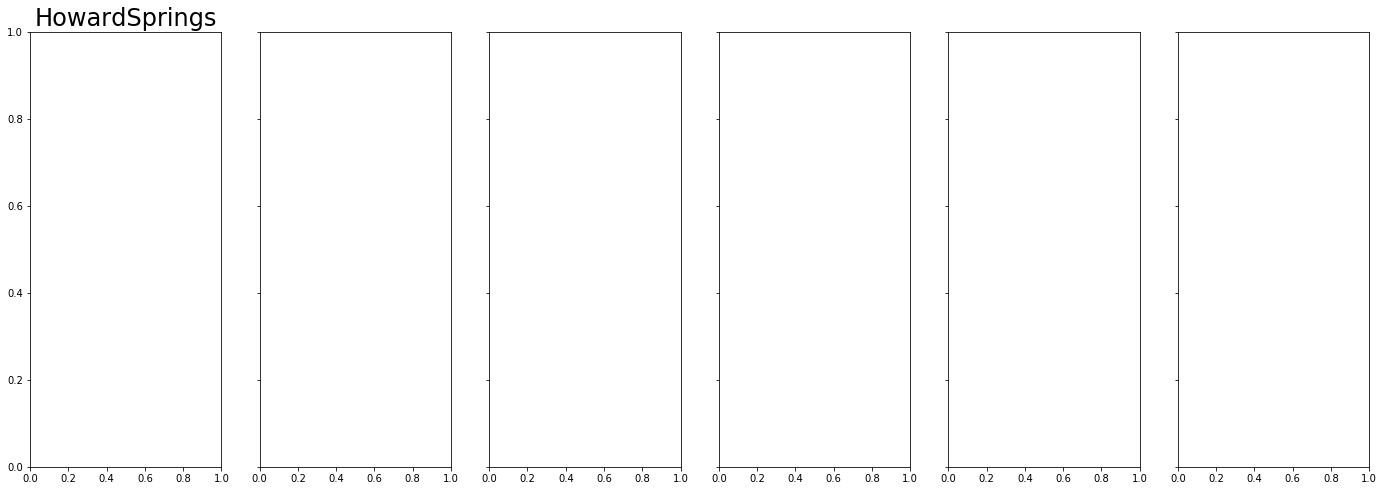

In [2]:
#load data
cpcff_vals = np.arange(0.2,2.8, 0.2)
study_sites = ["HowardSprings", "AdelaideRiver", "Litchfield", "DalyUncleared", "DryRiver", "SturtPlains" ]

labels = ''.join(str(e) for e in cpcff_vals)
labels = map(str, np.round(cpcff_vals,1) ) 
labels = list(labels)


fig=plt.figure(figsize=(16, 5), dpi= 80, facecolor='w', edgecolor='k')
fig, ax   = plt.subplots(nrows=1, ncols=6, figsize=(24, 8), sharex=True, sharey=True)   


i = 0

skipped = 0
#loop over all sites
for site in study_sites:
  
    
    loc = 1
    i_cpcff = 0
    NCPmax = 0
    #loop over all cpcff-values for the free-draining case
    for label in labels:   
        
        try:
            ebest_stats = np.genfromtxt("../../data/VOM_output/" + 
             site + "/freedrainage_cpcff" + label + "/sce_stats_best/evap_beststats.txt") #mm/d

            assbest_stats = np.genfromtxt("../../data/VOM_output/" + 
             site + "/freedrainage_cpcff" + label + "/sce_stats_best/ass_beststats.txt") #mm/d        

            infile = ["../../data/VOM_output/" + 
             site + "/nofreedrainage_cpcff" + label + "/sce_best/results_daily.txt"]
            #get NCP-value
            data = np.genfromtxt(infile[0], names=True)
            
            if( (np.sum(data["ncp_g"]) + np.sum(data["ncp_g"])) > NCPmax ):
                NCPmax = np.sum(data["ncp_g"]) + np.sum(data["ncp_g"])
                cpcff_ncpmax = cpcff_vals[i_cpcff]
                reass_ncpmax = assbest_stats[1]
                ree_ncpmax = ebest_stats[1]
                
            if(loc  == 1):
                box1 = ax[i].plot(cpcff_vals[i_cpcff], ebest_stats[1], '*r', markersize=15, label="evaporation" ) 
                ax[i].plot(cpcff_vals[i_cpcff], assbest_stats[1], '*b', markersize=15, label="assimilation" ) 
            else:
                box1 = ax[i].plot(cpcff_vals[i_cpcff], ebest_stats[1], '*r', markersize=15 ) 
                ax[i].plot(cpcff_vals[i_cpcff], assbest_stats[1], '*b', markersize=15 ) 
        
        except IOError:
            skipped = skipped + 1 
            print("../../data/VOM_output/" + 
             site + "/freedrainage_cpcff" + label + "/sce_stats_best/ass_beststats.txt')")

       
        i_cpcff = i_cpcff + 1        
        loc = loc + 2
        
    ax[i].set_title(site, size=24  )

    #plot solutions with highest NCP-value
    ax[i].plot(cpcff_ncpmax, reass_ncpmax, 'o', color = "green", markersize=15, label="Max. NCP", zorder=0 ) 
    ax[i].plot(cpcff_ncpmax, ree_ncpmax, 'o', color = "green", markersize=15, zorder=0) 
  
    ax[i].grid(b=True, which='major', color='grey', linestyle='--')

    for tick in ax[i].xaxis.get_major_ticks():
        tick.label.set_fontsize(15)
    for tick in ax[i].yaxis.get_major_ticks():
        tick.label.set_fontsize(15)
    i = i +1


fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.xlabel(r'cpcff ($\mu$$mol$ $m^3$ $s^{-1}$)', size = 25, labelpad=40)
plt.ylabel('Mean Annual Rel. Err. (-)', size = 25, labelpad=40)

plt.legend()
plt.tight_layout()
plt.show()

    
print("Missing files: ", + skipped)

The relative errors seem to go down for higher values of the costfactor in most cases. The smallest relative error seem to be between 0.6 and 1.2 $\mu mol m^3 s^{-1}$. At least, for most study sites several values approach zero, or change sign and cross the zero-axis. SturtPlains still shows a large offset for the assimilation. 

### Dynamic water tables

../../data/VOM_output/HowardSprings/nofreedrainage_cpcff0.2/sce_stats_best/ass_beststats.txt')
../../data/VOM_output/HowardSprings/nofreedrainage_cpcff0.4/sce_stats_best/ass_beststats.txt')
../../data/VOM_output/HowardSprings/nofreedrainage_cpcff0.6/sce_stats_best/ass_beststats.txt')
../../data/VOM_output/HowardSprings/nofreedrainage_cpcff0.8/sce_stats_best/ass_beststats.txt')
../../data/VOM_output/HowardSprings/nofreedrainage_cpcff1.0/sce_stats_best/ass_beststats.txt')
../../data/VOM_output/HowardSprings/nofreedrainage_cpcff1.2/sce_stats_best/ass_beststats.txt')
../../data/VOM_output/HowardSprings/nofreedrainage_cpcff1.4/sce_stats_best/ass_beststats.txt')
../../data/VOM_output/HowardSprings/nofreedrainage_cpcff1.6/sce_stats_best/ass_beststats.txt')
../../data/VOM_output/HowardSprings/nofreedrainage_cpcff1.8/sce_stats_best/ass_beststats.txt')
../../data/VOM_output/HowardSprings/nofreedrainage_cpcff2.0/sce_stats_best/ass_beststats.txt')
../../data/VOM_output/HowardSprings/nofreedrainage

NameError: name 'cpcff_ncpmax' is not defined

<Figure size 1280x400 with 0 Axes>

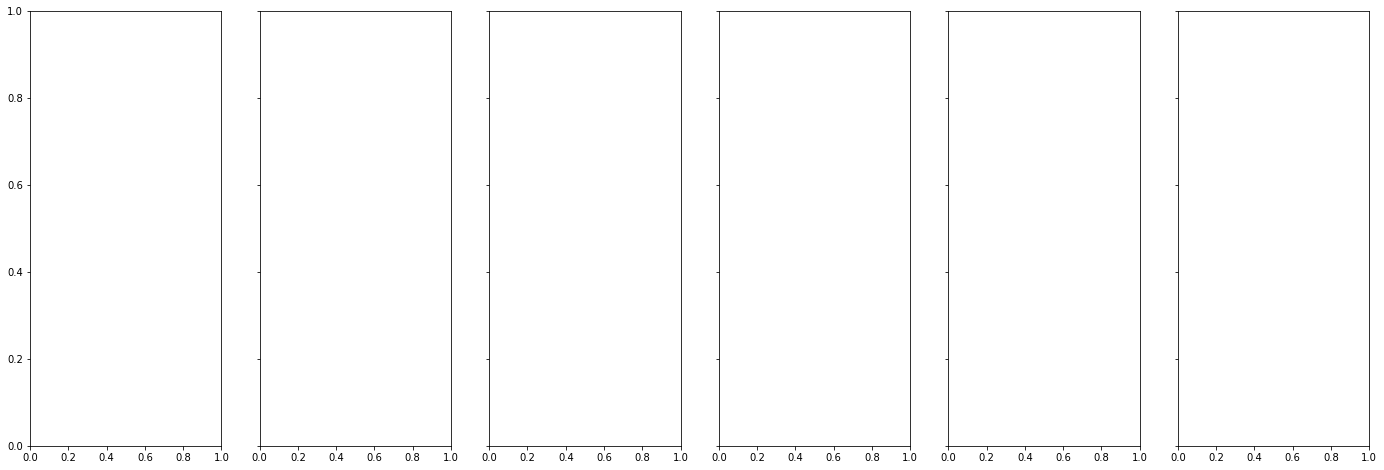

In [3]:
#load data, non-freedraining conditions
cpcff_vals = np.arange(0.2,2.8, 0.2)
study_sites = ["HowardSprings", "AdelaideRiver", "Litchfield", "DalyUncleared", "DryRiver", "SturtPlains" ]

labels = ''.join(str(e) for e in cpcff_vals)
labels = map(str, np.round(cpcff_vals,1) ) 
labels = list(labels)


fig=plt.figure(figsize=(16, 5), dpi= 80, facecolor='w', edgecolor='k')
fig, ax   = plt.subplots(nrows=1, ncols=6, figsize=(24, 8), sharex=True, sharey=True)   


i = 0
skipped = 0

#loop over all sites
for site in study_sites:
  
    
    loc = 1
    i_cpcff = 0
    NCPmax = 0
    #loop over all cpcff-values for the free-draining case
    for label in labels:   
        
        try:
            ebest_stats = np.genfromtxt("../../data/VOM_output/" + 
             site + "/nofreedrainage_cpcff" + label + "/sce_stats_best/evap_beststats.txt") #mm/d

            assbest_stats = np.genfromtxt("../../data/VOM_output/" + 
             site + "/nofreedrainage_cpcff" + label + "/sce_stats_best/ass_beststats.txt") #mm/d        

            infile = ["../../data/VOM_output/" + 
             site + "/nofreedrainage_cpcff" + label + "/sce_best/results_daily.txt"]
            #get NCP-value
            data = np.genfromtxt(infile[0], names=True)
            
            if( (np.sum(data["ncp_g"]) + np.sum(data["ncp_g"])) > NCPmax ):
                NCPmax = np.sum(data["ncp_g"]) + np.sum(data["ncp_g"])
                cpcff_ncpmax = cpcff_vals[i_cpcff]
                reass_ncpmax = assbest_stats[1]
                ree_ncpmax = ebest_stats[1]

            if(loc  == 1):
                box1 = ax[i].plot(cpcff_vals[i_cpcff], ebest_stats[1], '*r', markersize=15, label="evaporation" ) 
                ax[i].plot(cpcff_vals[i_cpcff], assbest_stats[1], '*b', markersize=15, label="assimilation" ) 
            else:
                box1 = ax[i].plot(cpcff_vals[i_cpcff], ebest_stats[1], '*r', markersize=15 ) 
                ax[i].plot(cpcff_vals[i_cpcff], assbest_stats[1], '*b', markersize=15 ) 
        except IOError:
            skipped = skipped + 1 
            print("../../data/VOM_output/" + 
             site + "/nofreedrainage_cpcff" + label + "/sce_stats_best/ass_beststats.txt')")
        i_cpcff = i_cpcff + 1        
        loc = loc + 2
    
    #plot solutions with highest NCP-value
    ax[i].plot(cpcff_ncpmax, reass_ncpmax, 'o', color = "green", markersize=15, label="Max. NCP", zorder=0 ) 
    ax[i].plot(cpcff_ncpmax, ree_ncpmax, 'o', color = "green", markersize=15, zorder=0) 

        
    ax[i].set_title(site, size=24  )
    ax[i].set_ylim([-2, 2])    
    ax[i].grid(b=True, which='major', color='grey', linestyle='--')


    for tick in ax[i].xaxis.get_major_ticks():
        tick.label.set_fontsize(15)
    for tick in ax[i].yaxis.get_major_ticks():
        tick.label.set_fontsize(15)
    ax[i].legend()
    i = i +1

fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.xlabel(r'cpcff ($\mu$$mol$ $m^3$ $s^{-1}$)', size = 25, labelpad=40)
plt.ylabel('Rel. Err (-)', size = 25, labelpad=40)

plt.tight_layout()
plt.show()
    
print("Missing files: ", + skipped)

The relative errors seem to go down for higher values of the costfactor in most cases. The smallest relative error seem to be between 0.6 and 1.2 $\mu mol m^3 s^{-1}$. At least, for most study sites several values approach zero, or change sign and cross the zero-axis. SturtPlains still shows a large offset for the assimilation. 

## Optimal costfactor
The minimum mean annual relative error should correspond to the most optimal value of the costfactor for water transport


../../data/VOM_output/HowardSprings/freedrainage_cpcff0.2/sce_stats_best/ass_beststats.txt')
../../data/VOM_output/HowardSprings/freedrainage_cpcff0.4/sce_stats_best/ass_beststats.txt')
../../data/VOM_output/HowardSprings/freedrainage_cpcff0.6/sce_stats_best/ass_beststats.txt')
../../data/VOM_output/HowardSprings/freedrainage_cpcff0.8/sce_stats_best/ass_beststats.txt')
../../data/VOM_output/HowardSprings/freedrainage_cpcff1.0/sce_stats_best/ass_beststats.txt')
../../data/VOM_output/HowardSprings/freedrainage_cpcff1.2/sce_stats_best/ass_beststats.txt')
../../data/VOM_output/HowardSprings/freedrainage_cpcff1.4/sce_stats_best/ass_beststats.txt')
../../data/VOM_output/HowardSprings/freedrainage_cpcff1.6/sce_stats_best/ass_beststats.txt')
../../data/VOM_output/HowardSprings/freedrainage_cpcff1.8/sce_stats_best/ass_beststats.txt')
../../data/VOM_output/HowardSprings/freedrainage_cpcff2.0/sce_stats_best/ass_beststats.txt')
../../data/VOM_output/HowardSprings/freedrainage_cpcff2.2/sce_stats_be

/home/remko/.local/lib/python3.6/site-packages/ipykernel_launcher.py:43: RuntimeWarning: All-NaN slice encountered
/home/remko/.local/lib/python3.6/site-packages/ipykernel_launcher.py:44: RuntimeWarning: All-NaN slice encountered


ValueError: x and y must have same first dimension, but have shapes (1,) and (0,)

<Figure size 1280x400 with 0 Axes>

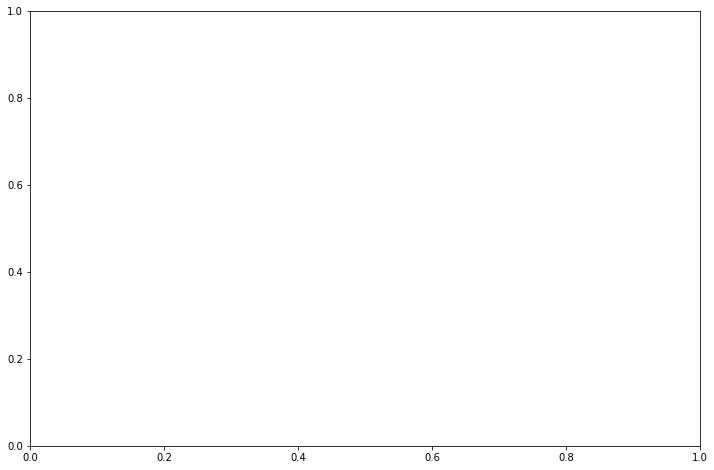

In [4]:
#load data
cpcff_vals = np.arange(0.2,2.8, 0.2)
study_sites = ["HowardSprings", "AdelaideRiver", "Litchfield", "DalyUncleared", "DryRiver", "SturtPlains" ]

labels = ''.join(str(e) for e in cpcff_vals)
labels = map(str, np.round(cpcff_vals,1) ) 
labels = list(labels)


fig=plt.figure(figsize=(16, 5), dpi= 80, facecolor='w', edgecolor='k')
fig, ax   = plt.subplots(nrows=1, ncols=1, figsize=(12, 8), sharex=True, sharey=True)   

loc = 1
skipped = 0
#loop over all sites
for site in study_sites:
  
    REe = np.zeros((13))
    REass = np.zeros((13))
    REe[:] = np.nan
    REass[:] = np.nan
    
    i = 0
    #loop over all cpcff-values for the free-draining case
    for cpcff in labels:   
        
        try:
            ebest_stats = np.genfromtxt("../../data/VOM_output/" + 
             site + "/freedrainage_cpcff" + cpcff + "/sce_stats_best/evap_beststats.txt") #mm/d

            assbest_stats = np.genfromtxt("../../data/VOM_output/" + 
             site + "/freedrainage_cpcff" + cpcff + "/sce_stats_best/ass_beststats.txt") #mm/d        

            REe[i] = ebest_stats[1]
            REass[i] = assbest_stats[1]
        
        except IOError:
            skipped = skipped + 1 
            print("../../data/VOM_output/" + 
             site + "/freedrainage_cpcff" + cpcff + "/sce_stats_best/ass_beststats.txt')")
        i = i + 1
    
    cpcff_opte = cpcff_vals[abs(REe) == np.nanmin(abs(REe))]
    cpcff_optass = cpcff_vals[abs(REass) == np.nanmin(abs(REass))]

    ax.plot(loc, cpcff_opte, '.r', markersize=25, label="evaporation" ) 
    ax.plot(loc, cpcff_optass, '*b', markersize=15, label="assimilation" ) 
     
    ax.set_ylim([0, 2.6])    
    #ax[i].set_xlim([0.5, loc-0.5])    
    ax.grid(b=True, which='major', color='grey', linestyle='--')
 
    ax.set_xticks( np.arange(1,8)  )  
    #ax[i].set_xticks( np.arange(1.5,29.5, 2), minor=True )  
    
    ax.set_xticklabels( study_sites, rotation=90, fontsize = 24 )  
    #ax.set_xticklabels( "" )  
    #ax[i].text(x=1, y=-1.93, s="Free draining", fontsize=20, rotation = 90, verticalalignment='bottom')
    #ax[i].text(x=0.5*loc+1, y=-1.93, s="Dynamic water table", fontsize=20, rotation = 90, verticalalignment='bottom')

    for tick in ax.xaxis.get_minor_ticks():
        tick.label.set_fontsize(15)
    for tick in ax.yaxis.get_major_ticks():
        tick.label.set_fontsize(15)
    loc = loc + 1

#fig.add_subplot(111, frameon=False)
#plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.ylabel(r'cpcff ($\mu$$mol$ $m^3$ $s^{-1}$)', size = 25, labelpad=40)
plt.xlabel('', size = 25, labelpad=40)

plt.tight_layout()
plt.show()
    
print("Missing files: ", + skipped)

../../data/VOM_output/HowardSprings/nofreedrainage_cpcff0.2/sce_stats_best/ass_beststats.txt')
../../data/VOM_output/HowardSprings/nofreedrainage_cpcff0.4/sce_stats_best/ass_beststats.txt')
../../data/VOM_output/HowardSprings/nofreedrainage_cpcff0.6/sce_stats_best/ass_beststats.txt')
../../data/VOM_output/HowardSprings/nofreedrainage_cpcff0.8/sce_stats_best/ass_beststats.txt')
../../data/VOM_output/HowardSprings/nofreedrainage_cpcff1.0/sce_stats_best/ass_beststats.txt')
../../data/VOM_output/HowardSprings/nofreedrainage_cpcff1.2/sce_stats_best/ass_beststats.txt')
../../data/VOM_output/HowardSprings/nofreedrainage_cpcff1.4/sce_stats_best/ass_beststats.txt')
../../data/VOM_output/HowardSprings/nofreedrainage_cpcff1.6/sce_stats_best/ass_beststats.txt')
../../data/VOM_output/HowardSprings/nofreedrainage_cpcff1.8/sce_stats_best/ass_beststats.txt')
../../data/VOM_output/HowardSprings/nofreedrainage_cpcff2.0/sce_stats_best/ass_beststats.txt')
../../data/VOM_output/HowardSprings/nofreedrainage

/home/remko/.local/lib/python3.6/site-packages/ipykernel_launcher.py:43: RuntimeWarning: All-NaN slice encountered
/home/remko/.local/lib/python3.6/site-packages/ipykernel_launcher.py:44: RuntimeWarning: All-NaN slice encountered


ValueError: x and y must have same first dimension, but have shapes (1,) and (0,)

<Figure size 1280x400 with 0 Axes>

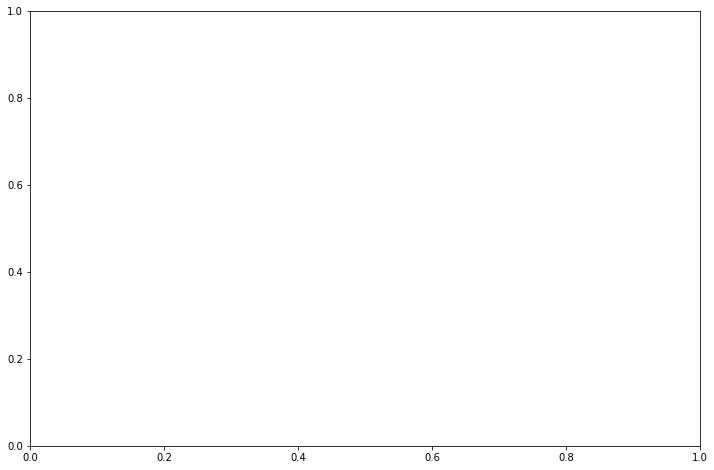

In [5]:
#load data
cpcff_vals = np.arange(0.2,2.8, 0.2)
study_sites = ["HowardSprings", "AdelaideRiver", "Litchfield", "DalyUncleared", "DryRiver", "SturtPlains" ]

labels = ''.join(str(e) for e in cpcff_vals)
labels = map(str, np.round(cpcff_vals,1) ) 
labels = list(labels)


fig=plt.figure(figsize=(16, 5), dpi= 80, facecolor='w', edgecolor='k')
fig, ax   = plt.subplots(nrows=1, ncols=1, figsize=(12, 8), sharex=True, sharey=True)   

loc = 1
skipped = 0
#loop over all sites
for site in study_sites:
  
    REe = np.zeros((13))
    REass = np.zeros((13))
    REe[:] = np.nan
    REass[:] = np.nan
    
    i = 0
    #loop over all cpcff-values for the free-draining case
    for cpcff in labels:   
        
        try:
            ebest_stats = np.genfromtxt("../../data/VOM_output/" + 
             site + "/nofreedrainage_cpcff" + cpcff + "/sce_stats_best/evap_beststats.txt") #mm/d

            assbest_stats = np.genfromtxt("../../data/VOM_output/" + 
             site + "/nofreedrainage_cpcff" + cpcff + "/sce_stats_best/ass_beststats.txt") #mm/d        

            REe[i] = ebest_stats[1]
            REass[i] = assbest_stats[1]
        
        except IOError:
            skipped = skipped + 1 
            print("../../data/VOM_output/" + 
             site + "/nofreedrainage_cpcff" + cpcff + "/sce_stats_best/ass_beststats.txt')")
        i = i + 1
    
    cpcff_opte = cpcff_vals[abs(REe) == np.nanmin(abs(REe))]
    cpcff_optass = cpcff_vals[abs(REass) == np.nanmin(abs(REass))]

    ax.plot(loc, cpcff_opte, '.r', markersize=25, label="evaporation" ) 
    ax.plot(loc, cpcff_optass, '*b', markersize=15, label="assimilation" ) 
     
    ax.set_ylim([0, 2.6])    
    #ax[i].set_xlim([0.5, loc-0.5])    
    ax.grid(b=True, which='major', color='grey', linestyle='--')
 
    ax.set_xticks( np.arange(1,8)  )  
    #ax[i].set_xticks( np.arange(1.5,29.5, 2), minor=True )  
    
    ax.set_xticklabels( study_sites, rotation=90, fontsize = 24 )  
    #ax.set_xticklabels( "" )  
    #ax[i].text(x=1, y=-1.93, s="Free draining", fontsize=20, rotation = 90, verticalalignment='bottom')
    #ax[i].text(x=0.5*loc+1, y=-1.93, s="Dynamic water table", fontsize=20, rotation = 90, verticalalignment='bottom')

    for tick in ax.xaxis.get_minor_ticks():
        tick.label.set_fontsize(15)
    for tick in ax.yaxis.get_major_ticks():
        tick.label.set_fontsize(15)
    loc = loc + 1

#fig.add_subplot(111, frameon=False)
#plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.ylabel(r'cpcff ($\mu$$mol$ $m^3$ $s^{-1}$)', size = 25, labelpad=40)
plt.xlabel('', size = 25, labelpad=40)

plt.tight_layout()
plt.show()
    
print("Missing files: ", + skipped)

The most optimal values, i.e. the cpcff-value with smallest relative error, still varies considerably between the study sites. Hence, even though the range is now extended, we cannot draw conclusions on what value it should have.

## Timeseries of evaporation
### Free-draining conditions

/home/remko/.local/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


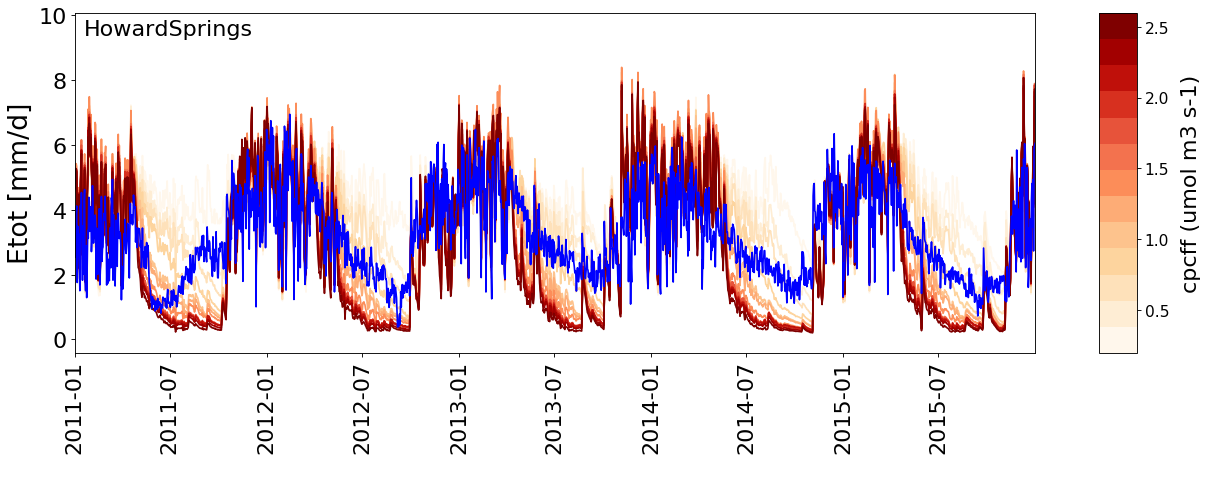

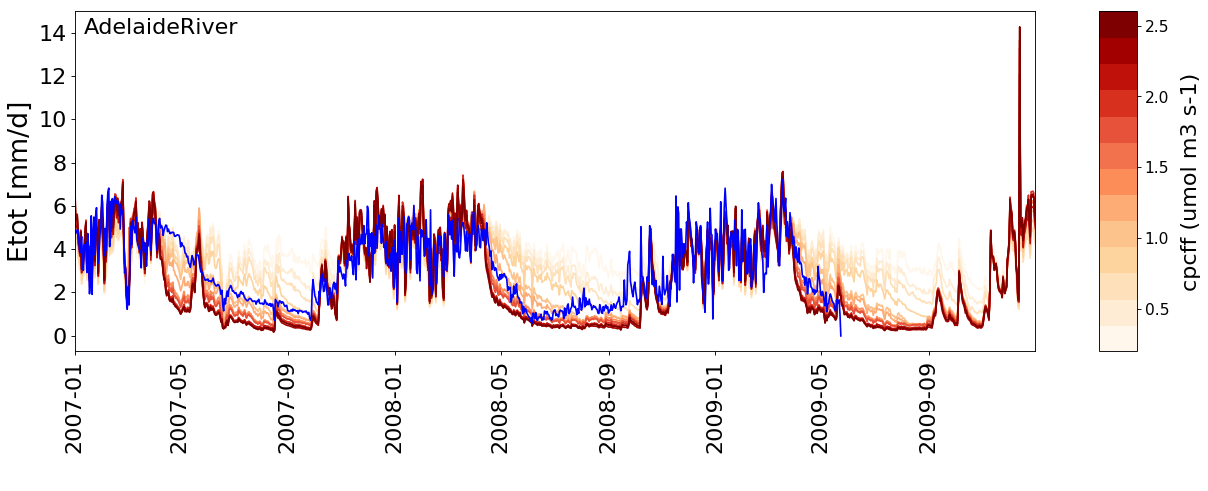

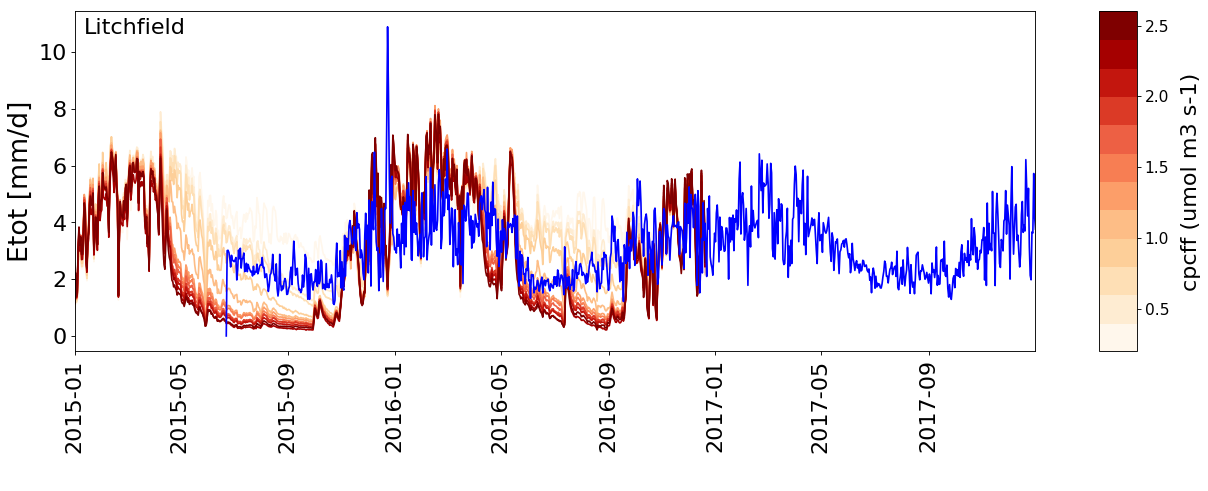

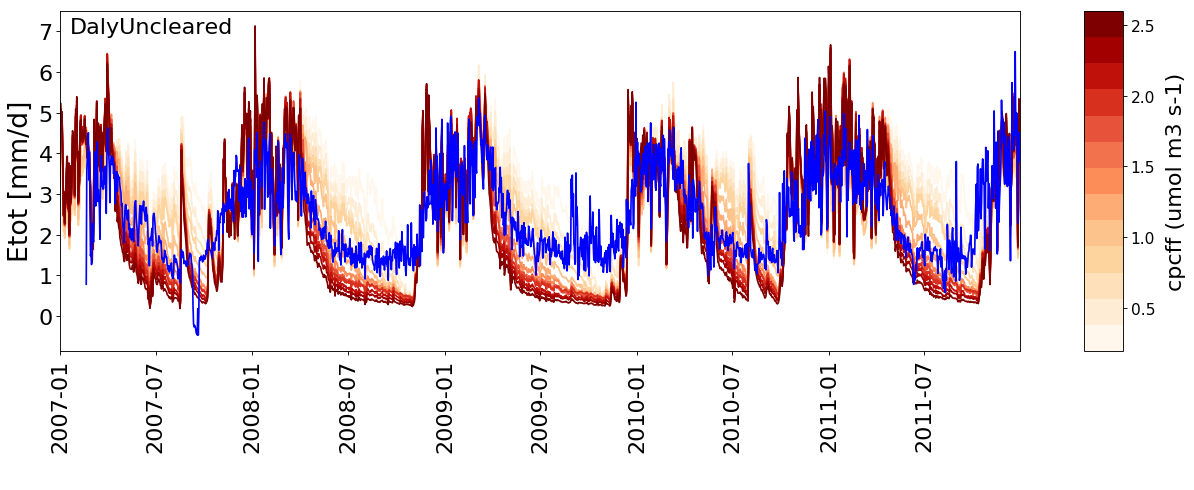

OSError: ../../data/VOM_output/DryRiver/freedrainage_cpcff2.6/sce_best/results_daily.txt not found.

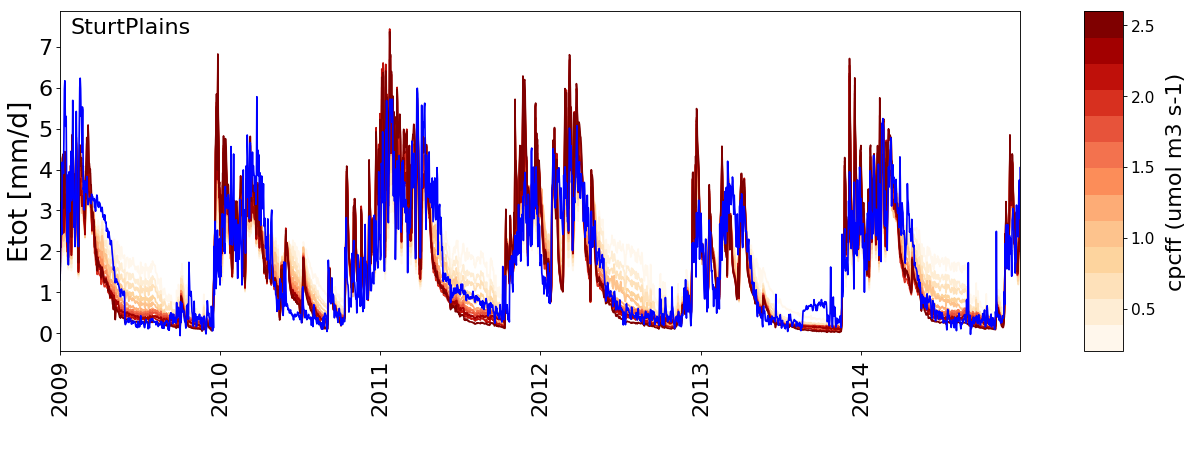

In [6]:
#HowardSprings
%run ../../src_py/plot_et_ass.py  \
-i ../../data/VOM_output/HowardSprings/freedrainage_cpcff0.2/sce_best/results_daily.txt \
../../data/VOM_output/HowardSprings/freedrainage_cpcff0.4/sce_best/results_daily.txt \
../../data/VOM_output/HowardSprings/freedrainage_cpcff0.6/sce_best/results_daily.txt \
../../data/VOM_output/HowardSprings/freedrainage_cpcff0.8/sce_best/results_daily.txt \
../../data/VOM_output/HowardSprings/freedrainage_cpcff1.0/sce_best/results_daily.txt \
../../data/VOM_output/HowardSprings/freedrainage_cpcff1.2/sce_best/results_daily.txt \
../../data/VOM_output/HowardSprings/freedrainage_cpcff1.4/sce_best/results_daily.txt \
../../data/VOM_output/HowardSprings/freedrainage_cpcff1.6/sce_best/results_daily.txt \
../../data/VOM_output/HowardSprings/freedrainage_cpcff1.8/sce_best/results_daily.txt \
../../data/VOM_output/HowardSprings/freedrainage_cpcff2.0/sce_best/results_daily.txt \
../../data/VOM_output/HowardSprings/freedrainage_cpcff2.2/sce_best/results_daily.txt \
../../data/VOM_output/HowardSprings/freedrainage_cpcff2.4/sce_best/results_daily.txt \
../../data/VOM_output/HowardSprings/freedrainage_cpcff2.6/sce_best/results_daily.txt \
-v evaptot -ys 2011 -ye 2015 -w ../../data/VOM_input/HowardSprings/dailyweather.prn \
--obs ../../data/DINGO/Ea_howard.txt --mf 1000 --ylabel "Etot [mm/d]" \
--plot_cbar True --cblabel "cpcff (umol m3 s-1)" --labels VOM VOM2 \
--title "HowardSprings"


#AdelaideRiver
%run ../../src_py/plot_et_ass.py  \
-i ../../data/VOM_output/AdelaideRiver/freedrainage_cpcff0.2/sce_best/results_daily.txt \
../../data/VOM_output/AdelaideRiver/freedrainage_cpcff0.4/sce_best/results_daily.txt \
../../data/VOM_output/AdelaideRiver/freedrainage_cpcff0.6/sce_best/results_daily.txt \
../../data/VOM_output/AdelaideRiver/freedrainage_cpcff0.8/sce_best/results_daily.txt \
../../data/VOM_output/AdelaideRiver/freedrainage_cpcff1.0/sce_best/results_daily.txt \
../../data/VOM_output/AdelaideRiver/freedrainage_cpcff1.2/sce_best/results_daily.txt \
../../data/VOM_output/AdelaideRiver/freedrainage_cpcff1.4/sce_best/results_daily.txt \
../../data/VOM_output/AdelaideRiver/freedrainage_cpcff1.6/sce_best/results_daily.txt \
../../data/VOM_output/AdelaideRiver/freedrainage_cpcff1.8/sce_best/results_daily.txt \
../../data/VOM_output/AdelaideRiver/freedrainage_cpcff2.0/sce_best/results_daily.txt \
../../data/VOM_output/AdelaideRiver/freedrainage_cpcff2.2/sce_best/results_daily.txt \
../../data/VOM_output/AdelaideRiver/freedrainage_cpcff2.4/sce_best/results_daily.txt \
../../data/VOM_output/AdelaideRiver/freedrainage_cpcff2.6/sce_best/results_daily.txt \
-v evaptot -ys 2007 -ye 2009 -w ../../data/VOM_input/AdelaideRiver/dailyweather.prn \
--obs ../../data/DINGO/Ea_adelaide.txt --mf 1000 --ylabel "Etot [mm/d]" \
--plot_cbar True --cblabel "cpcff (umol m3 s-1)" --labels VOM VOM2 \
--title "AdelaideRiver"

#Litchfield
%run ../../src_py/plot_et_ass.py  \
-i ../../data/VOM_output/Litchfield/freedrainage_cpcff0.2/sce_best/results_daily.txt \
../../data/VOM_output/Litchfield/freedrainage_cpcff0.4/sce_best/results_daily.txt \
../../data/VOM_output/Litchfield/freedrainage_cpcff0.6/sce_best/results_daily.txt \
../../data/VOM_output/Litchfield/freedrainage_cpcff0.8/sce_best/results_daily.txt \
../../data/VOM_output/Litchfield/freedrainage_cpcff1.0/sce_best/results_daily.txt \
../../data/VOM_output/Litchfield/freedrainage_cpcff1.2/sce_best/results_daily.txt \
../../data/VOM_output/Litchfield/freedrainage_cpcff1.4/sce_best/results_daily.txt \
../../data/VOM_output/Litchfield/freedrainage_cpcff1.6/sce_best/results_daily.txt \
../../data/VOM_output/Litchfield/freedrainage_cpcff1.8/sce_best/results_daily.txt \
../../data/VOM_output/Litchfield/freedrainage_cpcff2.0/sce_best/results_daily.txt \
../../data/VOM_output/Litchfield/freedrainage_cpcff2.4/sce_best/results_daily.txt \
../../data/VOM_output/Litchfield/freedrainage_cpcff2.6/sce_best/results_daily.txt \
-v evaptot -ys 2015 -ye 2017 -w ../../data/VOM_input/Litchfield/dailyweather.prn \
--obs ../../data/DINGO/Ea_litch.txt --mf 1000 --ylabel "Etot [mm/d]" \
--plot_cbar True --cblabel "cpcff (umol m3 s-1)" --labels VOM VOM2 \
--title "Litchfield"

#DalyUncleared
%run ../../src_py/plot_et_ass.py  \
-i ../../data/VOM_output/DalyUncleared/freedrainage_cpcff0.2/sce_best/results_daily.txt \
../../data/VOM_output/DalyUncleared/freedrainage_cpcff0.4/sce_best/results_daily.txt \
../../data/VOM_output/DalyUncleared/freedrainage_cpcff0.6/sce_best/results_daily.txt \
../../data/VOM_output/DalyUncleared/freedrainage_cpcff0.8/sce_best/results_daily.txt \
../../data/VOM_output/DalyUncleared/freedrainage_cpcff1.0/sce_best/results_daily.txt \
../../data/VOM_output/DalyUncleared/freedrainage_cpcff1.2/sce_best/results_daily.txt \
../../data/VOM_output/DalyUncleared/freedrainage_cpcff1.4/sce_best/results_daily.txt \
../../data/VOM_output/DalyUncleared/freedrainage_cpcff1.6/sce_best/results_daily.txt \
../../data/VOM_output/DalyUncleared/freedrainage_cpcff1.8/sce_best/results_daily.txt \
../../data/VOM_output/DalyUncleared/freedrainage_cpcff2.0/sce_best/results_daily.txt \
../../data/VOM_output/DalyUncleared/freedrainage_cpcff2.2/sce_best/results_daily.txt \
../../data/VOM_output/DalyUncleared/freedrainage_cpcff2.4/sce_best/results_daily.txt \
../../data/VOM_output/DalyUncleared/freedrainage_cpcff2.6/sce_best/results_daily.txt \
-v evaptot -ys 2007 -ye 2011 -w ../../data/VOM_input/DalyUncleared/dailyweather.prn \
--obs ../../data/DINGO/Ea_daly.txt --mf 1000 --ylabel "Etot [mm/d]" \
--plot_cbar True --cblabel "cpcff (umol m3 s-1)" --labels VOM VOM2 \
--title "DalyUncleared"

#DryRiver
%run ../../src_py/plot_et_ass.py  \
-i ../../data/VOM_output/DryRiver/freedrainage_cpcff0.2/sce_best/results_daily.txt \
../../data/VOM_output/DryRiver/freedrainage_cpcff0.4/sce_best/results_daily.txt \
../../data/VOM_output/DryRiver/freedrainage_cpcff0.6/sce_best/results_daily.txt \
../../data/VOM_output/DryRiver/freedrainage_cpcff0.8/sce_best/results_daily.txt \
../../data/VOM_output/DryRiver/freedrainage_cpcff1.0/sce_best/results_daily.txt \
../../data/VOM_output/DryRiver/freedrainage_cpcff1.2/sce_best/results_daily.txt \
../../data/VOM_output/DryRiver/freedrainage_cpcff1.4/sce_best/results_daily.txt \
../../data/VOM_output/DryRiver/freedrainage_cpcff1.6/sce_best/results_daily.txt \
../../data/VOM_output/DryRiver/freedrainage_cpcff1.8/sce_best/results_daily.txt \
../../data/VOM_output/DryRiver/freedrainage_cpcff2.0/sce_best/results_daily.txt \
../../data/VOM_output/DryRiver/freedrainage_cpcff2.4/sce_best/results_daily.txt \
../../data/VOM_output/DryRiver/freedrainage_cpcff2.6/sce_best/results_daily.txt \
-v evaptot -ys 2011 -ye 2015 -w ../../data/VOM_input/DryRiver/dailyweather.prn \
--obs ../../data/DINGO/Ea_dry.txt --mf 1000 --ylabel "Etot [mm/d]" \
--plot_cbar True --cblabel "cpcff (umol m3 s-1)" --labels VOM VOM2 \
--title "DryRiver"

#SturtPlains
%run ../../src_py/plot_et_ass.py  \
-i ../../data/VOM_output/SturtPlains/freedrainage_cpcff0.2/sce_best/results_daily.txt \
../../data/VOM_output/SturtPlains/freedrainage_cpcff0.4/sce_best/results_daily.txt \
../../data/VOM_output/SturtPlains/freedrainage_cpcff0.6/sce_best/results_daily.txt \
../../data/VOM_output/SturtPlains/freedrainage_cpcff0.8/sce_best/results_daily.txt \
../../data/VOM_output/SturtPlains/freedrainage_cpcff1.0/sce_best/results_daily.txt \
../../data/VOM_output/SturtPlains/freedrainage_cpcff1.2/sce_best/results_daily.txt \
../../data/VOM_output/SturtPlains/freedrainage_cpcff1.4/sce_best/results_daily.txt \
../../data/VOM_output/SturtPlains/freedrainage_cpcff1.6/sce_best/results_daily.txt \
../../data/VOM_output/SturtPlains/freedrainage_cpcff1.8/sce_best/results_daily.txt \
../../data/VOM_output/SturtPlains/freedrainage_cpcff2.0/sce_best/results_daily.txt \
../../data/VOM_output/SturtPlains/freedrainage_cpcff2.2/sce_best/results_daily.txt \
../../data/VOM_output/SturtPlains/freedrainage_cpcff2.4/sce_best/results_daily.txt \
../../data/VOM_output/SturtPlains/freedrainage_cpcff2.6/sce_best/results_daily.txt \
-v evaptot -ys 2009 -ye 2014 -w ../../data/VOM_input/SturtPlains/dailyweather.prn \
--obs ../../data/DINGO/Ea_sturt.txt --mf 1000 --ylabel "Etot [mm/d]" \
--plot_cbar True --cblabel "cpcff (umol m3 s-1)" --labels VOM VOM2 \
--title "SturtPlains"


The timeseries of total evaporation show a reasonable fit for most values of the cost factor (colored from light yellow to darkred) with the observations (blue), similar as the plots of relative errors suggest. Best results seem to be in the mid-range of the values. 

During wet-season, hardly any differences for the different cpcff-values.

### Dynamic water tables

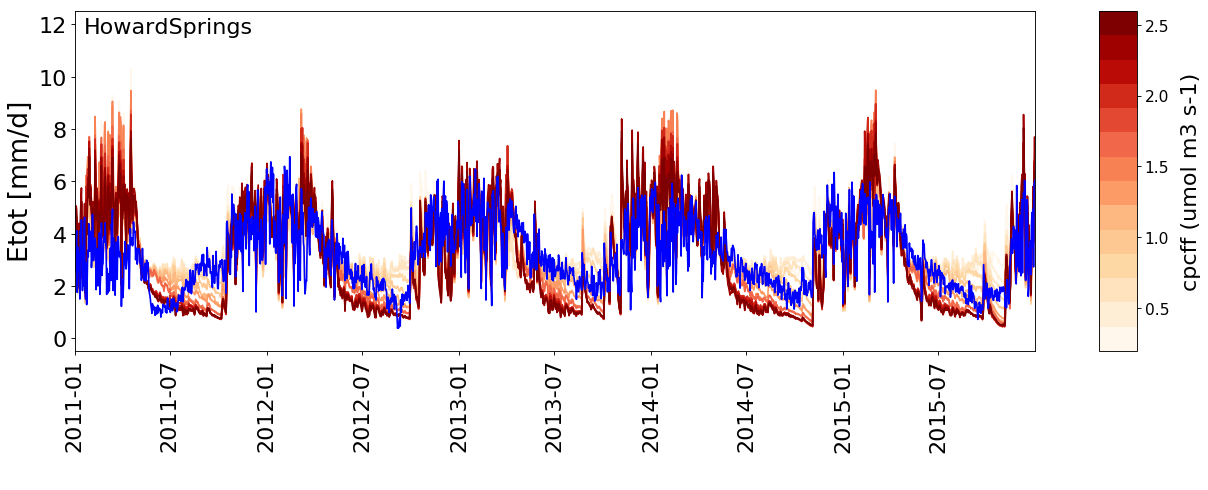

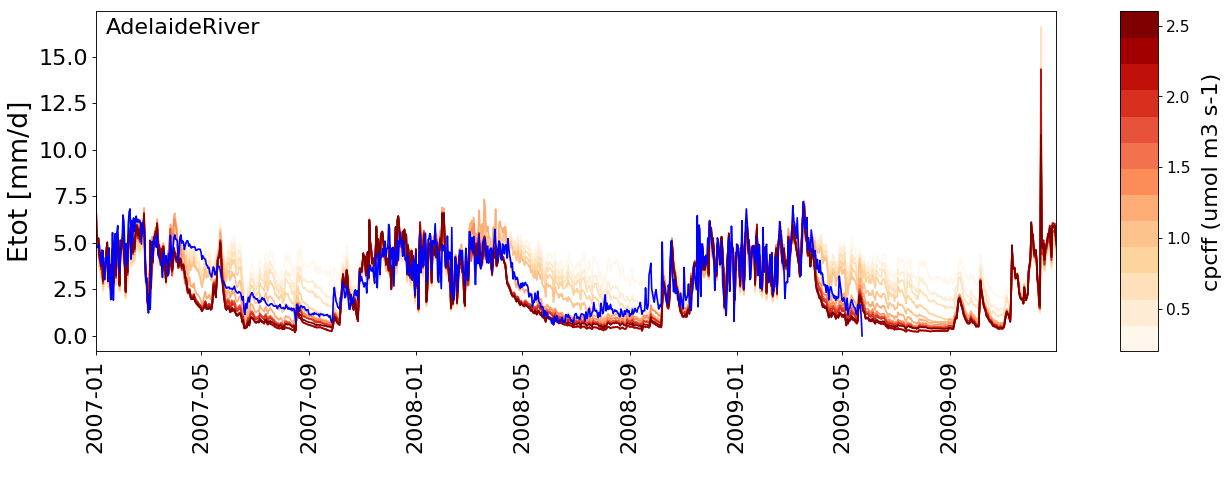

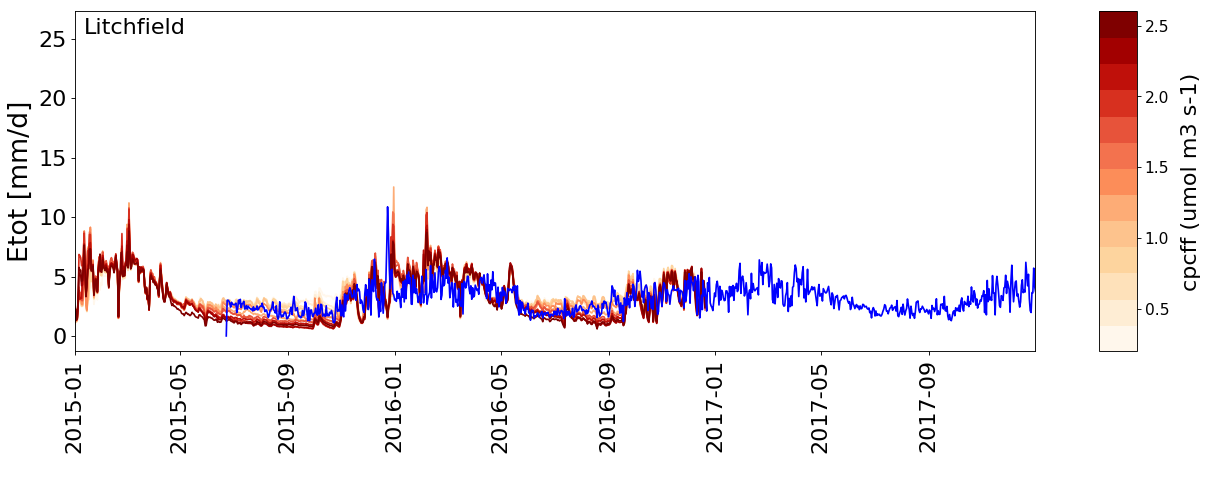

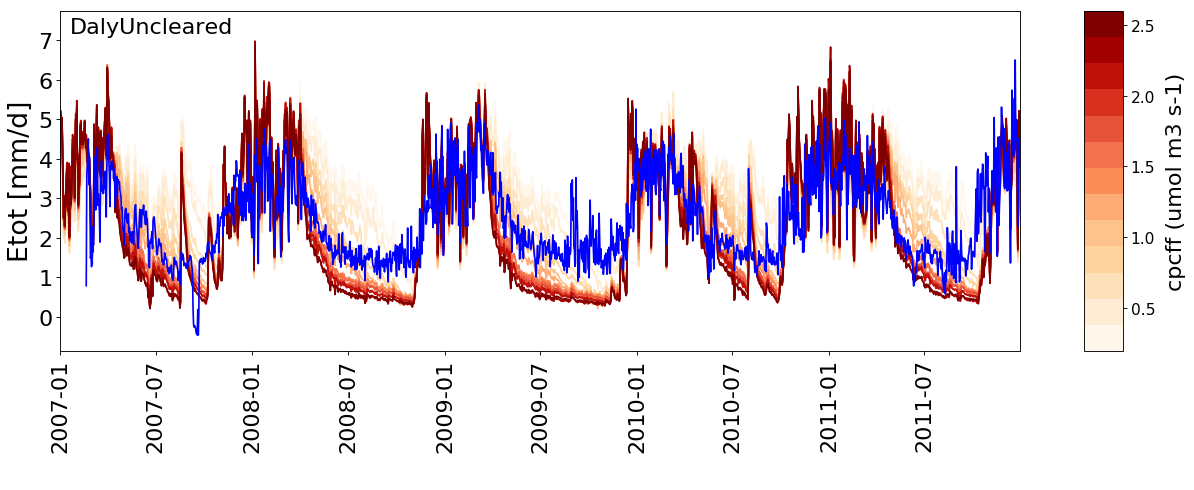

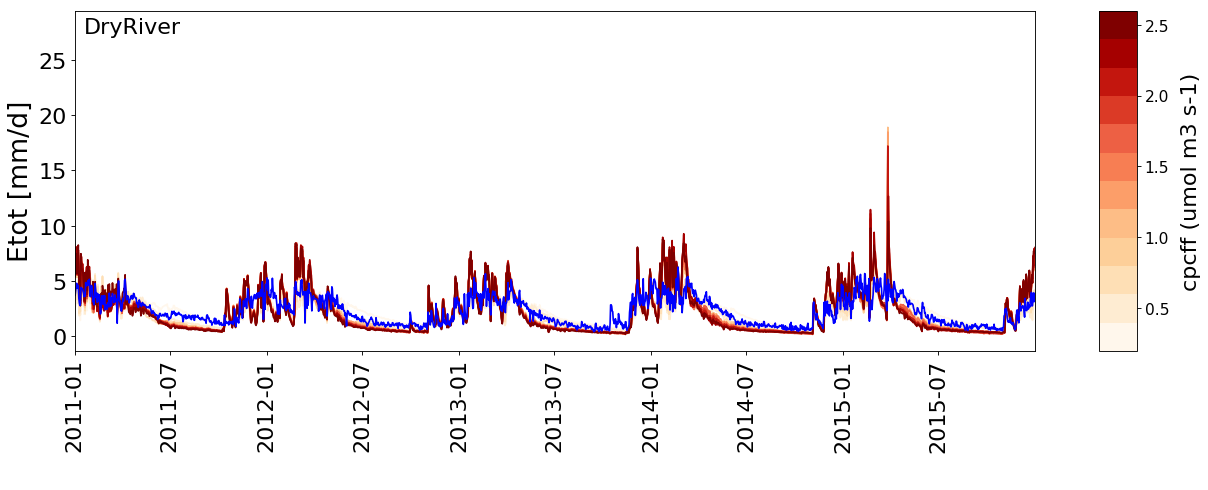

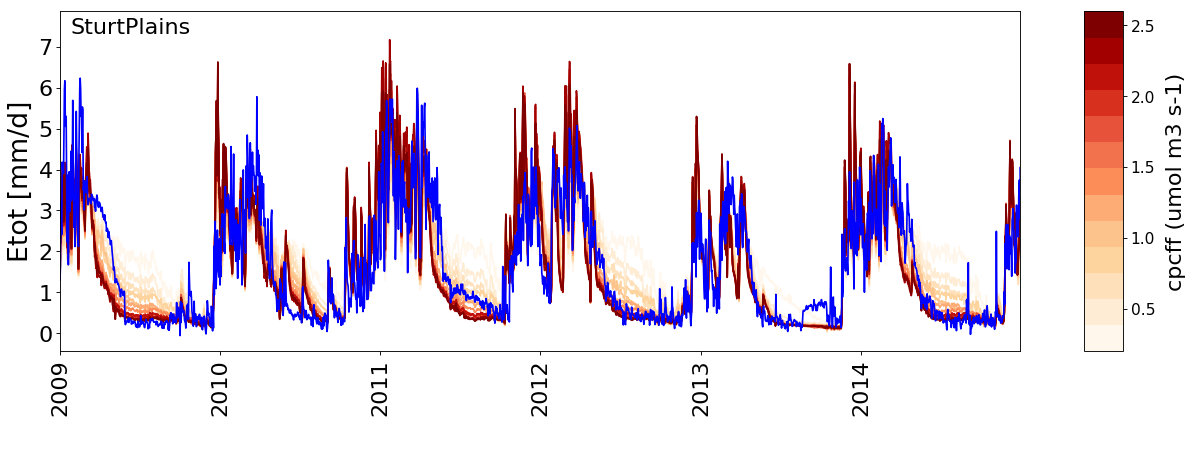

In [7]:
#HowardSprings
%run ../../src_py/plot_et_ass.py  \
-i ../../data/VOM_output/HowardSprings/nofreedrainage_cpcff0.2/sce_best/results_daily.txt \
../../data/VOM_output/HowardSprings/nofreedrainage_cpcff0.4/sce_best/results_daily.txt \
../../data/VOM_output/HowardSprings/nofreedrainage_cpcff0.6/sce_best/results_daily.txt \
../../data/VOM_output/HowardSprings/nofreedrainage_cpcff0.8/sce_best/results_daily.txt \
../../data/VOM_output/HowardSprings/nofreedrainage_cpcff1.0/sce_best/results_daily.txt \
../../data/VOM_output/HowardSprings/nofreedrainage_cpcff1.2/sce_best/results_daily.txt \
../../data/VOM_output/HowardSprings/nofreedrainage_cpcff1.4/sce_best/results_daily.txt \
../../data/VOM_output/HowardSprings/nofreedrainage_cpcff1.6/sce_best/results_daily.txt \
../../data/VOM_output/HowardSprings/nofreedrainage_cpcff1.8/sce_best/results_daily.txt \
../../data/VOM_output/HowardSprings/nofreedrainage_cpcff2.0/sce_best/results_daily.txt \
../../data/VOM_output/HowardSprings/nofreedrainage_cpcff2.0/sce_best/results_daily.txt \
../../data/VOM_output/HowardSprings/nofreedrainage_cpcff2.2/sce_best/results_daily.txt \
../../data/VOM_output/HowardSprings/nofreedrainage_cpcff2.4/sce_best/results_daily.txt \
../../data/VOM_output/HowardSprings/nofreedrainage_cpcff2.6/sce_best/results_daily.txt \
-v evaptot -ys 2011 -ye 2015 -w ../../data/VOM_input/HowardSprings/dailyweather.prn \
--obs ../../data/DINGO/Ea_howard.txt --mf 1000 --ylabel "Etot [mm/d]" \
--plot_cbar True --cblabel "cpcff (umol m3 s-1)" --labels VOM VOM2 \
--title "HowardSprings"

#AdelaideRiver
%run ../../src_py/plot_et_ass.py  \
-i ../../data/VOM_output/AdelaideRiver/nofreedrainage_cpcff0.2/sce_best/results_daily.txt \
../../data/VOM_output/AdelaideRiver/nofreedrainage_cpcff0.4/sce_best/results_daily.txt \
../../data/VOM_output/AdelaideRiver/nofreedrainage_cpcff0.6/sce_best/results_daily.txt \
../../data/VOM_output/AdelaideRiver/nofreedrainage_cpcff0.8/sce_best/results_daily.txt \
../../data/VOM_output/AdelaideRiver/nofreedrainage_cpcff1.0/sce_best/results_daily.txt \
../../data/VOM_output/AdelaideRiver/nofreedrainage_cpcff1.2/sce_best/results_daily.txt \
../../data/VOM_output/AdelaideRiver/nofreedrainage_cpcff1.4/sce_best/results_daily.txt \
../../data/VOM_output/AdelaideRiver/nofreedrainage_cpcff1.6/sce_best/results_daily.txt \
../../data/VOM_output/AdelaideRiver/nofreedrainage_cpcff1.8/sce_best/results_daily.txt \
../../data/VOM_output/AdelaideRiver/nofreedrainage_cpcff2.0/sce_best/results_daily.txt \
../../data/VOM_output/AdelaideRiver/nofreedrainage_cpcff2.2/sce_best/results_daily.txt \
../../data/VOM_output/AdelaideRiver/nofreedrainage_cpcff2.4/sce_best/results_daily.txt \
../../data/VOM_output/AdelaideRiver/nofreedrainage_cpcff2.6/sce_best/results_daily.txt \
-v evaptot -ys 2007 -ye 2009 -w ../../data/VOM_input/AdelaideRiver/dailyweather.prn \
--obs ../../data/DINGO/Ea_adelaide.txt --mf 1000 --ylabel "Etot [mm/d]" \
--plot_cbar True --cblabel "cpcff (umol m3 s-1)" --labels VOM VOM2 \
--title "AdelaideRiver"

#Litchfield
%run ../../src_py/plot_et_ass.py  \
-i ../../data/VOM_output/Litchfield/nofreedrainage_cpcff0.2/sce_best/results_daily.txt \
../../data/VOM_output/Litchfield/nofreedrainage_cpcff0.4/sce_best/results_daily.txt \
../../data/VOM_output/Litchfield/nofreedrainage_cpcff0.6/sce_best/results_daily.txt \
../../data/VOM_output/Litchfield/nofreedrainage_cpcff0.8/sce_best/results_daily.txt \
../../data/VOM_output/Litchfield/nofreedrainage_cpcff1.0/sce_best/results_daily.txt \
../../data/VOM_output/Litchfield/nofreedrainage_cpcff1.2/sce_best/results_daily.txt \
../../data/VOM_output/Litchfield/nofreedrainage_cpcff1.4/sce_best/results_daily.txt \
../../data/VOM_output/Litchfield/nofreedrainage_cpcff1.6/sce_best/results_daily.txt \
../../data/VOM_output/Litchfield/nofreedrainage_cpcff1.8/sce_best/results_daily.txt \
../../data/VOM_output/Litchfield/nofreedrainage_cpcff2.0/sce_best/results_daily.txt \
../../data/VOM_output/Litchfield/nofreedrainage_cpcff2.2/sce_best/results_daily.txt \
../../data/VOM_output/Litchfield/nofreedrainage_cpcff2.4/sce_best/results_daily.txt \
../../data/VOM_output/Litchfield/nofreedrainage_cpcff2.6/sce_best/results_daily.txt \
-v evaptot -ys 2015 -ye 2017 -w ../../data/VOM_input/Litchfield/dailyweather.prn \
--obs ../../data/DINGO/Ea_litch.txt --mf 1000 --ylabel "Etot [mm/d]" \
--plot_cbar True --cblabel "cpcff (umol m3 s-1)" --labels VOM VOM2 \
--title "Litchfield"

#DalyUncleared
%run ../../src_py/plot_et_ass.py  \
-i ../../data/VOM_output/DalyUncleared/nofreedrainage_cpcff0.2/sce_best/results_daily.txt \
../../data/VOM_output/DalyUncleared/nofreedrainage_cpcff0.4/sce_best/results_daily.txt \
../../data/VOM_output/DalyUncleared/nofreedrainage_cpcff0.6/sce_best/results_daily.txt \
../../data/VOM_output/DalyUncleared/nofreedrainage_cpcff0.8/sce_best/results_daily.txt \
../../data/VOM_output/DalyUncleared/nofreedrainage_cpcff1.0/sce_best/results_daily.txt \
../../data/VOM_output/DalyUncleared/nofreedrainage_cpcff1.2/sce_best/results_daily.txt \
../../data/VOM_output/DalyUncleared/nofreedrainage_cpcff1.4/sce_best/results_daily.txt \
../../data/VOM_output/DalyUncleared/nofreedrainage_cpcff1.6/sce_best/results_daily.txt \
../../data/VOM_output/DalyUncleared/nofreedrainage_cpcff1.8/sce_best/results_daily.txt \
../../data/VOM_output/DalyUncleared/nofreedrainage_cpcff2.0/sce_best/results_daily.txt \
../../data/VOM_output/DalyUncleared/nofreedrainage_cpcff2.2/sce_best/results_daily.txt \
../../data/VOM_output/DalyUncleared/nofreedrainage_cpcff2.4/sce_best/results_daily.txt \
../../data/VOM_output/DalyUncleared/nofreedrainage_cpcff2.6/sce_best/results_daily.txt \
-v evaptot -ys 2007 -ye 2011 -w ../../data/VOM_input/DalyUncleared/dailyweather.prn \
--obs ../../data/DINGO/Ea_daly.txt --mf 1000 --ylabel "Etot [mm/d]" \
--plot_cbar True --cblabel "cpcff (umol m3 s-1)" --labels VOM VOM2 \
--title "DalyUncleared"

#DryRiver
%run ../../src_py/plot_et_ass.py  \
-i ../../data/VOM_output/DryRiver/nofreedrainage_cpcff0.2/sce_best/results_daily.txt \
../../data/VOM_output/DryRiver/nofreedrainage_cpcff0.4/sce_best/results_daily.txt \
../../data/VOM_output/DryRiver/nofreedrainage_cpcff0.8/sce_best/results_daily.txt \
../../data/VOM_output/DryRiver/nofreedrainage_cpcff1.0/sce_best/results_daily.txt \
../../data/VOM_output/DryRiver/nofreedrainage_cpcff1.2/sce_best/results_daily.txt \
../../data/VOM_output/DryRiver/nofreedrainage_cpcff1.4/sce_best/results_daily.txt \
../../data/VOM_output/DryRiver/nofreedrainage_cpcff1.6/sce_best/results_daily.txt \
../../data/VOM_output/DryRiver/nofreedrainage_cpcff1.8/sce_best/results_daily.txt \
../../data/VOM_output/DryRiver/nofreedrainage_cpcff2.0/sce_best/results_daily.txt \
../../data/VOM_output/DryRiver/nofreedrainage_cpcff2.2/sce_best/results_daily.txt \
../../data/VOM_output/DryRiver/nofreedrainage_cpcff2.4/sce_best/results_daily.txt \
../../data/VOM_output/DryRiver/nofreedrainage_cpcff2.6/sce_best/results_daily.txt \
-v evaptot -ys 2011 -ye 2015 -w ../../data/VOM_input/DryRiver/dailyweather.prn \
--obs ../../data/DINGO/Ea_dry.txt --mf 1000 --ylabel "Etot [mm/d]" \
--plot_cbar True --cblabel "cpcff (umol m3 s-1)" --labels VOM VOM2 \
--title "DryRiver"

#SturtPlains
%run ../../src_py/plot_et_ass.py  \
-i ../../data/VOM_output/SturtPlains/nofreedrainage_cpcff0.2/sce_best/results_daily.txt \
../../data/VOM_output/SturtPlains/nofreedrainage_cpcff0.4/sce_best/results_daily.txt \
../../data/VOM_output/SturtPlains/nofreedrainage_cpcff0.6/sce_best/results_daily.txt \
../../data/VOM_output/SturtPlains/nofreedrainage_cpcff0.8/sce_best/results_daily.txt \
../../data/VOM_output/SturtPlains/nofreedrainage_cpcff1.0/sce_best/results_daily.txt \
../../data/VOM_output/SturtPlains/nofreedrainage_cpcff1.2/sce_best/results_daily.txt \
../../data/VOM_output/SturtPlains/nofreedrainage_cpcff1.4/sce_best/results_daily.txt \
../../data/VOM_output/SturtPlains/nofreedrainage_cpcff1.6/sce_best/results_daily.txt \
../../data/VOM_output/SturtPlains/nofreedrainage_cpcff1.8/sce_best/results_daily.txt \
../../data/VOM_output/SturtPlains/nofreedrainage_cpcff2.0/sce_best/results_daily.txt \
../../data/VOM_output/SturtPlains/nofreedrainage_cpcff2.2/sce_best/results_daily.txt \
../../data/VOM_output/SturtPlains/nofreedrainage_cpcff2.4/sce_best/results_daily.txt \
../../data/VOM_output/SturtPlains/nofreedrainage_cpcff2.6/sce_best/results_daily.txt \
-v evaptot -ys 2009 -ye 2014 -w ../../data/VOM_input/SturtPlains/dailyweather.prn \
--obs ../../data/DINGO/Ea_sturt.txt --mf 1000 --ylabel "Etot [mm/d]" \
--plot_cbar True --cblabel "cpcff (umol m3 s-1)" --labels VOM VOM2 \
--title "SturtPlains"


Also for case of the dynamic water tables, the timeseries of total evaporation show a reasonable fit for most values of the cost factor (colored from light yellow to darkred) with the observations (blue), similar as the plots of relative errors suggest. Best results seem to be in the mid-range of the values. 

## Timeseries of assimilation
### Free-draining conditions

In [ ]:


#HowardSprings
%run ../../src_py/plot_et_ass.py  \
-i ../../data/VOM_output/HowardSprings/freedrainage_cpcff0.2/sce_best/results_daily.txt \
../../data/VOM_output/HowardSprings/freedrainage_cpcff0.4/sce_best/results_daily.txt \
../../data/VOM_output/HowardSprings/freedrainage_cpcff0.6/sce_best/results_daily.txt \
../../data/VOM_output/HowardSprings/freedrainage_cpcff0.8/sce_best/results_daily.txt \
../../data/VOM_output/HowardSprings/freedrainage_cpcff1.0/sce_best/results_daily.txt \
../../data/VOM_output/HowardSprings/freedrainage_cpcff1.2/sce_best/results_daily.txt \
../../data/VOM_output/HowardSprings/freedrainage_cpcff1.4/sce_best/results_daily.txt \
../../data/VOM_output/HowardSprings/freedrainage_cpcff1.6/sce_best/results_daily.txt \
../../data/VOM_output/HowardSprings/freedrainage_cpcff1.8/sce_best/results_daily.txt \
../../data/VOM_output/HowardSprings/freedrainage_cpcff2.0/sce_best/results_daily.txt \
../../data/VOM_output/HowardSprings/freedrainage_cpcff2.2/sce_best/results_daily.txt \
../../data/VOM_output/HowardSprings/freedrainage_cpcff2.4/sce_best/results_daily.txt \
../../data/VOM_output/HowardSprings/freedrainage_cpcff2.6/sce_best/results_daily.txt \
-v asstot -ys 2011 -ye 2015 -w ../../data/VOM_input/HowardSprings/dailyweather.prn \
--obs ../../data/DINGO/GPPdaily_howard.txt --mf_obs -1 --ylabel "CO2 [mol/m2/d]" \
--plot_cbar True --cblabel "cpcff (umol m3 s-1)" --labels VOM VOM2 \
--title "HowardSprings"

#AdelaideRiver
%run ../../src_py/plot_et_ass.py  \
-i ../../data/VOM_output/AdelaideRiver/freedrainage_cpcff0.2/sce_best/results_daily.txt \
../../data/VOM_output/AdelaideRiver/freedrainage_cpcff0.4/sce_best/results_daily.txt \
../../data/VOM_output/AdelaideRiver/freedrainage_cpcff0.6/sce_best/results_daily.txt \
../../data/VOM_output/AdelaideRiver/freedrainage_cpcff0.8/sce_best/results_daily.txt \
../../data/VOM_output/AdelaideRiver/freedrainage_cpcff1.0/sce_best/results_daily.txt \
../../data/VOM_output/AdelaideRiver/freedrainage_cpcff1.2/sce_best/results_daily.txt \
../../data/VOM_output/AdelaideRiver/freedrainage_cpcff1.4/sce_best/results_daily.txt \
../../data/VOM_output/AdelaideRiver/freedrainage_cpcff1.6/sce_best/results_daily.txt \
../../data/VOM_output/AdelaideRiver/freedrainage_cpcff1.8/sce_best/results_daily.txt \
../../data/VOM_output/AdelaideRiver/freedrainage_cpcff2.0/sce_best/results_daily.txt \
../../data/VOM_output/AdelaideRiver/freedrainage_cpcff2.2/sce_best/results_daily.txt \
../../data/VOM_output/AdelaideRiver/freedrainage_cpcff2.4/sce_best/results_daily.txt \
../../data/VOM_output/AdelaideRiver/freedrainage_cpcff2.6/sce_best/results_daily.txt \
-v asstot -ys 2007 -ye 2009 -w ../../data/VOM_input/AdelaideRiver/dailyweather.prn \
--obs ../../data/DINGO/GPPdaily_adelaide.txt --mf_obs -1 --ylabel "CO2 [mol/m2/d]" \
--plot_cbar True --cblabel "cpcff (umol m3 s-1)" --labels VOM VOM2 \
--title "AdelaideRiver"

#Litchfield
%run ../../src_py/plot_et_ass.py  \
-i ../../data/VOM_output/Litchfield/freedrainage_cpcff0.2/sce_best/results_daily.txt \
../../data/VOM_output/Litchfield/freedrainage_cpcff0.4/sce_best/results_daily.txt \
../../data/VOM_output/Litchfield/freedrainage_cpcff0.6/sce_best/results_daily.txt \
../../data/VOM_output/Litchfield/freedrainage_cpcff0.8/sce_best/results_daily.txt \
../../data/VOM_output/Litchfield/freedrainage_cpcff1.0/sce_best/results_daily.txt \
../../data/VOM_output/Litchfield/freedrainage_cpcff1.2/sce_best/results_daily.txt \
../../data/VOM_output/Litchfield/freedrainage_cpcff1.4/sce_best/results_daily.txt \
../../data/VOM_output/Litchfield/freedrainage_cpcff1.6/sce_best/results_daily.txt \
../../data/VOM_output/Litchfield/freedrainage_cpcff1.8/sce_best/results_daily.txt \
../../data/VOM_output/Litchfield/freedrainage_cpcff2.0/sce_best/results_daily.txt \
../../data/VOM_output/Litchfield/freedrainage_cpcff2.4/sce_best/results_daily.txt \
../../data/VOM_output/Litchfield/freedrainage_cpcff2.6/sce_best/results_daily.txt \
-v asstot -ys 2015 -ye 2017 -w ../../data/VOM_input/Litchfield/dailyweather.prn \
--obs ../../data/DINGO/GPPdaily_litch.txt --mf_obs -1 --ylabel "CO2 [mol/m2/d]" \
--plot_cbar True --cblabel "cpcff (umol m3 s-1)" --labels VOM VOM2 \
--title "Litchfield"


#DalyUncleared
%run ../../src_py/plot_et_ass.py  \
-i ../../data/VOM_output/DalyUncleared/freedrainage_cpcff0.2/sce_best/results_daily.txt \
../../data/VOM_output/DalyUncleared/freedrainage_cpcff0.4/sce_best/results_daily.txt \
../../data/VOM_output/DalyUncleared/freedrainage_cpcff0.6/sce_best/results_daily.txt \
../../data/VOM_output/DalyUncleared/freedrainage_cpcff0.8/sce_best/results_daily.txt \
../../data/VOM_output/DalyUncleared/freedrainage_cpcff1.0/sce_best/results_daily.txt \
../../data/VOM_output/DalyUncleared/freedrainage_cpcff1.2/sce_best/results_daily.txt \
../../data/VOM_output/DalyUncleared/freedrainage_cpcff1.4/sce_best/results_daily.txt \
../../data/VOM_output/DalyUncleared/freedrainage_cpcff1.6/sce_best/results_daily.txt \
../../data/VOM_output/DalyUncleared/freedrainage_cpcff1.8/sce_best/results_daily.txt \
../../data/VOM_output/DalyUncleared/freedrainage_cpcff2.0/sce_best/results_daily.txt \
../../data/VOM_output/DalyUncleared/freedrainage_cpcff2.2/sce_best/results_daily.txt \
../../data/VOM_output/DalyUncleared/freedrainage_cpcff2.4/sce_best/results_daily.txt \
../../data/VOM_output/DalyUncleared/freedrainage_cpcff2.6/sce_best/results_daily.txt \
-v asstot -ys 2007 -ye 2011 -w ../../data/VOM_input/DalyUncleared/dailyweather.prn \
--obs ../../data/DINGO/GPPdaily_daly.txt --mf_obs -1 --ylabel "CO2 [mol/m2/d]" \
--plot_cbar True --cblabel "cpcff (umol m3 s-1)" --labels VOM VOM2 \
--title "DalyUncleared"

#DryRiver
%run ../../src_py/plot_et_ass.py  \
-i ../../data/VOM_output/DryRiver/freedrainage_cpcff0.2/sce_best/results_daily.txt \
../../data/VOM_output/DryRiver/freedrainage_cpcff0.4/sce_best/results_daily.txt \
../../data/VOM_output/DryRiver/freedrainage_cpcff0.6/sce_best/results_daily.txt \
../../data/VOM_output/DryRiver/freedrainage_cpcff0.8/sce_best/results_daily.txt \
../../data/VOM_output/DryRiver/freedrainage_cpcff1.0/sce_best/results_daily.txt \
../../data/VOM_output/DryRiver/freedrainage_cpcff1.2/sce_best/results_daily.txt \
../../data/VOM_output/DryRiver/freedrainage_cpcff1.4/sce_best/results_daily.txt \
../../data/VOM_output/DryRiver/freedrainage_cpcff1.6/sce_best/results_daily.txt \
../../data/VOM_output/DryRiver/freedrainage_cpcff1.8/sce_best/results_daily.txt \
../../data/VOM_output/DryRiver/freedrainage_cpcff2.0/sce_best/results_daily.txt \
../../data/VOM_output/DryRiver/freedrainage_cpcff2.4/sce_best/results_daily.txt \
../../data/VOM_output/DryRiver/freedrainage_cpcff2.6/sce_best/results_daily.txt \
-v evaptot -ys 2011 -ye 2015 -w ../../data/VOM_input/DryRiver/dailyweather.prn \
-v asstot -ys 2011 -ye 2015 -w ../../data/VOM_input/DryRiver/dailyweather.prn \
--obs ../../data/DINGO/GPPdaily_dry.txt --mf_obs -1 --ylabel "CO2 [mol/m2/d]" \
--plot_cbar True --cblabel "cpcff (umol m3 s-1)" --labels VOM VOM2 \
--title "DryRiver"

#SturtPlains
%run ../../src_py/plot_et_ass.py  \
-i ../../data/VOM_output/SturtPlains/freedrainage_cpcff0.2/sce_best/results_daily.txt \
../../data/VOM_output/SturtPlains/freedrainage_cpcff0.4/sce_best/results_daily.txt \
../../data/VOM_output/SturtPlains/freedrainage_cpcff0.6/sce_best/results_daily.txt \
../../data/VOM_output/SturtPlains/freedrainage_cpcff0.8/sce_best/results_daily.txt \
../../data/VOM_output/SturtPlains/freedrainage_cpcff1.0/sce_best/results_daily.txt \
../../data/VOM_output/SturtPlains/freedrainage_cpcff1.2/sce_best/results_daily.txt \
../../data/VOM_output/SturtPlains/freedrainage_cpcff1.4/sce_best/results_daily.txt \
../../data/VOM_output/SturtPlains/freedrainage_cpcff1.6/sce_best/results_daily.txt \
../../data/VOM_output/SturtPlains/freedrainage_cpcff1.8/sce_best/results_daily.txt \
../../data/VOM_output/SturtPlains/freedrainage_cpcff2.0/sce_best/results_daily.txt \
../../data/VOM_output/SturtPlains/freedrainage_cpcff2.2/sce_best/results_daily.txt \
../../data/VOM_output/SturtPlains/freedrainage_cpcff2.4/sce_best/results_daily.txt \
../../data/VOM_output/SturtPlains/freedrainage_cpcff2.6/sce_best/results_daily.txt \
-v asstot -ys 2009 -ye 2014 -w ../../data/VOM_input/SturtPlains/dailyweather.prn \
--obs ../../data/DINGO/GPPdaily_sturt.txt --mf_obs -1 --ylabel "CO2 [mol/m2/d]" \
--plot_cbar True --cblabel "cpcff (umol m3 s-1)" --labels VOM VOM2 \
--title "SturtPlains"


The timeseries of total assimilation show a reasonable fit for most values of the cost factor (colored from light yellow to darkred) with the observations (blue). Best results seem to be in the mid-range of the values. However, strong off-sets can be observed for several cases of the DryRiver (5th plot), where values approach zero. SturtPlains still shows a large bias too. 

### Dynamic water tables

In [ ]:


#HowardSprings
%run ../../src_py/plot_et_ass.py  \
-i ../../data/VOM_output/HowardSprings/nofreedrainage_cpcff0.2/sce_best/results_daily.txt \
../../data/VOM_output/HowardSprings/nofreedrainage_cpcff0.4/sce_best/results_daily.txt \
../../data/VOM_output/HowardSprings/nofreedrainage_cpcff0.6/sce_best/results_daily.txt \
../../data/VOM_output/HowardSprings/nofreedrainage_cpcff0.8/sce_best/results_daily.txt \
../../data/VOM_output/HowardSprings/nofreedrainage_cpcff1.0/sce_best/results_daily.txt \
../../data/VOM_output/HowardSprings/nofreedrainage_cpcff1.2/sce_best/results_daily.txt \
../../data/VOM_output/HowardSprings/nofreedrainage_cpcff1.4/sce_best/results_daily.txt \
../../data/VOM_output/HowardSprings/nofreedrainage_cpcff1.6/sce_best/results_daily.txt \
../../data/VOM_output/HowardSprings/nofreedrainage_cpcff1.8/sce_best/results_daily.txt \
../../data/VOM_output/HowardSprings/nofreedrainage_cpcff2.0/sce_best/results_daily.txt \
../../data/VOM_output/HowardSprings/nofreedrainage_cpcff2.0/sce_best/results_daily.txt \
../../data/VOM_output/HowardSprings/nofreedrainage_cpcff2.2/sce_best/results_daily.txt \
../../data/VOM_output/HowardSprings/nofreedrainage_cpcff2.4/sce_best/results_daily.txt \
../../data/VOM_output/HowardSprings/nofreedrainage_cpcff2.6/sce_best/results_daily.txt \
-v asstot -ys 2011 -ye 2015 -w ../../data/VOM_input/HowardSprings/dailyweather.prn \
--obs ../../data/DINGO/GPPdaily_howard.txt --mf_obs -1 --ylabel "CO2 [mol/m2/d]" \
--plot_cbar True --cblabel "cpcff (umol m3 s-1)" --labels VOM VOM2 \
--title "HowardSprings"

#AdelaideRiver
%run ../../src_py/plot_et_ass.py  \
-i ../../data/VOM_output/AdelaideRiver/nofreedrainage_cpcff0.2/sce_best/results_daily.txt \
../../data/VOM_output/AdelaideRiver/nofreedrainage_cpcff0.4/sce_best/results_daily.txt \
../../data/VOM_output/AdelaideRiver/nofreedrainage_cpcff0.6/sce_best/results_daily.txt \
../../data/VOM_output/AdelaideRiver/nofreedrainage_cpcff0.8/sce_best/results_daily.txt \
../../data/VOM_output/AdelaideRiver/nofreedrainage_cpcff1.0/sce_best/results_daily.txt \
../../data/VOM_output/AdelaideRiver/nofreedrainage_cpcff1.2/sce_best/results_daily.txt \
../../data/VOM_output/AdelaideRiver/nofreedrainage_cpcff1.4/sce_best/results_daily.txt \
../../data/VOM_output/AdelaideRiver/nofreedrainage_cpcff1.6/sce_best/results_daily.txt \
../../data/VOM_output/AdelaideRiver/nofreedrainage_cpcff1.8/sce_best/results_daily.txt \
../../data/VOM_output/AdelaideRiver/nofreedrainage_cpcff2.0/sce_best/results_daily.txt \
../../data/VOM_output/AdelaideRiver/nofreedrainage_cpcff2.2/sce_best/results_daily.txt \
../../data/VOM_output/AdelaideRiver/nofreedrainage_cpcff2.4/sce_best/results_daily.txt \
../../data/VOM_output/AdelaideRiver/nofreedrainage_cpcff2.6/sce_best/results_daily.txt \
-v asstot -ys 2007 -ye 2009 -w ../../data/VOM_input/AdelaideRiver/dailyweather.prn \
--obs ../../data/DINGO/GPPdaily_adelaide.txt --mf_obs -1 --ylabel "CO2 [mol/m2/d]" \
--plot_cbar True --cblabel "cpcff (umol m3 s-1)" --labels VOM VOM2 \
--title "AdelaideRiver"


#Litchfield
%run ../../src_py/plot_et_ass.py  \
-i ../../data/VOM_output/Litchfield/nofreedrainage_cpcff0.2/sce_best/results_daily.txt \
../../data/VOM_output/Litchfield/nofreedrainage_cpcff0.4/sce_best/results_daily.txt \
../../data/VOM_output/Litchfield/nofreedrainage_cpcff0.6/sce_best/results_daily.txt \
../../data/VOM_output/Litchfield/nofreedrainage_cpcff0.8/sce_best/results_daily.txt \
../../data/VOM_output/Litchfield/nofreedrainage_cpcff1.0/sce_best/results_daily.txt \
../../data/VOM_output/Litchfield/nofreedrainage_cpcff1.2/sce_best/results_daily.txt \
../../data/VOM_output/Litchfield/nofreedrainage_cpcff1.4/sce_best/results_daily.txt \
../../data/VOM_output/Litchfield/nofreedrainage_cpcff1.6/sce_best/results_daily.txt \
../../data/VOM_output/Litchfield/nofreedrainage_cpcff1.8/sce_best/results_daily.txt \
../../data/VOM_output/Litchfield/nofreedrainage_cpcff2.0/sce_best/results_daily.txt \
../../data/VOM_output/Litchfield/nofreedrainage_cpcff2.2/sce_best/results_daily.txt \
../../data/VOM_output/Litchfield/nofreedrainage_cpcff2.4/sce_best/results_daily.txt \
../../data/VOM_output/Litchfield/nofreedrainage_cpcff2.6/sce_best/results_daily.txt \
-v asstot -ys 2015 -ye 2017 -w ../../data/VOM_input/Litchfield/dailyweather.prn \
--obs ../../data/DINGO/GPPdaily_litch.txt --mf_obs -1 --ylabel "CO2 [mol/m2/d]" \
--plot_cbar True --cblabel "cpcff (umol m3 s-1)" --labels VOM VOM2 \
--title "Litchfield"

#DalyUncleared
%run ../../src_py/plot_et_ass.py  \
-i ../../data/VOM_output/DalyUncleared/nofreedrainage_cpcff0.2/sce_best/results_daily.txt \
../../data/VOM_output/DalyUncleared/nofreedrainage_cpcff0.4/sce_best/results_daily.txt \
../../data/VOM_output/DalyUncleared/nofreedrainage_cpcff0.6/sce_best/results_daily.txt \
../../data/VOM_output/DalyUncleared/nofreedrainage_cpcff0.8/sce_best/results_daily.txt \
../../data/VOM_output/DalyUncleared/nofreedrainage_cpcff1.0/sce_best/results_daily.txt \
../../data/VOM_output/DalyUncleared/nofreedrainage_cpcff1.2/sce_best/results_daily.txt \
../../data/VOM_output/DalyUncleared/nofreedrainage_cpcff1.4/sce_best/results_daily.txt \
../../data/VOM_output/DalyUncleared/nofreedrainage_cpcff1.6/sce_best/results_daily.txt \
../../data/VOM_output/DalyUncleared/nofreedrainage_cpcff1.8/sce_best/results_daily.txt \
../../data/VOM_output/DalyUncleared/nofreedrainage_cpcff2.0/sce_best/results_daily.txt \
../../data/VOM_output/DalyUncleared/nofreedrainage_cpcff2.2/sce_best/results_daily.txt \
../../data/VOM_output/DalyUncleared/nofreedrainage_cpcff2.4/sce_best/results_daily.txt \
../../data/VOM_output/DalyUncleared/nofreedrainage_cpcff2.6/sce_best/results_daily.txt \
-v asstot -ys 2007 -ye 2011 -w ../../data/VOM_input/DalyUncleared/dailyweather.prn \
--obs ../../data/DINGO/GPPdaily_daly.txt --mf_obs -1 --ylabel "CO2 [mol/m2/d]" \
--plot_cbar True --cblabel "cpcff (umol m3 s-1)" --labels VOM VOM2 \
--title "DalyUncleared"

#DryRiver
%run ../../src_py/plot_et_ass.py  \
-i ../../data/VOM_output/DryRiver/nofreedrainage_cpcff0.2/sce_best/results_daily.txt \
../../data/VOM_output/DryRiver/nofreedrainage_cpcff0.4/sce_best/results_daily.txt \
../../data/VOM_output/DryRiver/nofreedrainage_cpcff0.8/sce_best/results_daily.txt \
../../data/VOM_output/DryRiver/nofreedrainage_cpcff1.0/sce_best/results_daily.txt \
../../data/VOM_output/DryRiver/nofreedrainage_cpcff1.2/sce_best/results_daily.txt \
../../data/VOM_output/DryRiver/nofreedrainage_cpcff1.4/sce_best/results_daily.txt \
../../data/VOM_output/DryRiver/nofreedrainage_cpcff1.6/sce_best/results_daily.txt \
../../data/VOM_output/DryRiver/nofreedrainage_cpcff1.8/sce_best/results_daily.txt \
../../data/VOM_output/DryRiver/nofreedrainage_cpcff2.0/sce_best/results_daily.txt \
../../data/VOM_output/DryRiver/nofreedrainage_cpcff2.2/sce_best/results_daily.txt \
../../data/VOM_output/DryRiver/nofreedrainage_cpcff2.4/sce_best/results_daily.txt \
../../data/VOM_output/DryRiver/nofreedrainage_cpcff2.6/sce_best/results_daily.txt \
-v asstot -ys 2011 -ye 2015 -w ../../data/VOM_input/DryRiver/dailyweather.prn \
--obs ../../data/DINGO/GPPdaily_dry.txt --mf_obs -1 --ylabel "CO2 [mol/m2/d]" \
--plot_cbar True --cblabel "cpcff (umol m3 s-1)" --labels VOM VOM2 \
--title "DryRiver"

#SturtPlains
%run ../../src_py/plot_et_ass.py  \
-i ../../data/VOM_output/SturtPlains/nofreedrainage_cpcff0.2/sce_best/results_daily.txt \
../../data/VOM_output/SturtPlains/nofreedrainage_cpcff0.4/sce_best/results_daily.txt \
../../data/VOM_output/SturtPlains/nofreedrainage_cpcff0.6/sce_best/results_daily.txt \
../../data/VOM_output/SturtPlains/nofreedrainage_cpcff0.8/sce_best/results_daily.txt \
../../data/VOM_output/SturtPlains/nofreedrainage_cpcff1.0/sce_best/results_daily.txt \
../../data/VOM_output/SturtPlains/nofreedrainage_cpcff1.2/sce_best/results_daily.txt \
../../data/VOM_output/SturtPlains/nofreedrainage_cpcff1.4/sce_best/results_daily.txt \
../../data/VOM_output/SturtPlains/nofreedrainage_cpcff1.6/sce_best/results_daily.txt \
../../data/VOM_output/SturtPlains/nofreedrainage_cpcff1.8/sce_best/results_daily.txt \
../../data/VOM_output/SturtPlains/nofreedrainage_cpcff2.0/sce_best/results_daily.txt \
../../data/VOM_output/SturtPlains/nofreedrainage_cpcff2.2/sce_best/results_daily.txt \
../../data/VOM_output/SturtPlains/nofreedrainage_cpcff2.4/sce_best/results_daily.txt \
../../data/VOM_output/SturtPlains/nofreedrainage_cpcff2.6/sce_best/results_daily.txt \
-v asstot -ys 2009 -ye 2014 -w ../../data/VOM_input/SturtPlains/dailyweather.prn \
--obs ../../data/DINGO/GPPdaily_sturt.txt --mf_obs -1 --ylabel "CO2 [mol/m2/d]" \
--plot_cbar True --cblabel "cpcff (umol m3 s-1)" --labels VOM VOM2 \
--title "SturtPlains"


The timeseries of total assimilation show a reasonable fit for most values of the cost factor (colored from light yellow to darkred) with the observations (blue). Best results seem to be in the mid-range of the values. However, strong off-sets can be observed for several cases of the DryRiver (5th plot), where values approach zero. SturtPlains still shows a large bias too. 

## Timeseries of vegetation cover
### Free-draining conditions

In [ ]:
#HowardSprings
%run ../../src_py/plot_vegetation.py  \
-i ../../data/VOM_output/HowardSprings/freedrainage_cpcff0.2/sce_best/results_daily.txt \
../../data/VOM_output/HowardSprings/freedrainage_cpcff0.4/sce_best/results_daily.txt \
../../data/VOM_output/HowardSprings/freedrainage_cpcff0.6/sce_best/results_daily.txt \
../../data/VOM_output/HowardSprings/freedrainage_cpcff0.8/sce_best/results_daily.txt \
../../data/VOM_output/HowardSprings/freedrainage_cpcff1.0/sce_best/results_daily.txt \
../../data/VOM_output/HowardSprings/freedrainage_cpcff1.2/sce_best/results_daily.txt \
../../data/VOM_output/HowardSprings/freedrainage_cpcff1.4/sce_best/results_daily.txt \
../../data/VOM_output/HowardSprings/freedrainage_cpcff1.6/sce_best/results_daily.txt \
../../data/VOM_output/HowardSprings/freedrainage_cpcff1.8/sce_best/results_daily.txt \
../../data/VOM_output/HowardSprings/freedrainage_cpcff2.0/sce_best/results_daily.txt \
../../data/VOM_output/HowardSprings/freedrainage_cpcff2.2/sce_best/results_daily.txt \
../../data/VOM_output/HowardSprings/freedrainage_cpcff2.4/sce_best/results_daily.txt \
../../data/VOM_output/HowardSprings/freedrainage_cpcff2.6/sce_best/results_daily.txt \
-v pc -ys 2006 -ye 2011 -w ../../data/VOM_input/HowardSprings/dailyweather.prn \
--obs ../../data/fPAR/fpar_howard_v5.txt --obsdates ../../data/fPAR/dates_v5 \
--ylabel "Proj. Cover [-]" --mf 100 \
--plot_cbar True --cblabel "cpcff (umol m3 s-1)" --labels VOM VOM2 \
--title "HowardSprings"

#AdelaideRiver
%run ../../src_py/plot_vegetation.py  \
-i ../../data/VOM_output/AdelaideRiver/freedrainage_cpcff0.2/sce_best/results_daily.txt \
../../data/VOM_output/AdelaideRiver/freedrainage_cpcff0.4/sce_best/results_daily.txt \
../../data/VOM_output/AdelaideRiver/freedrainage_cpcff0.6/sce_best/results_daily.txt \
../../data/VOM_output/AdelaideRiver/freedrainage_cpcff0.8/sce_best/results_daily.txt \
../../data/VOM_output/AdelaideRiver/freedrainage_cpcff1.0/sce_best/results_daily.txt \
../../data/VOM_output/AdelaideRiver/freedrainage_cpcff1.2/sce_best/results_daily.txt \
../../data/VOM_output/AdelaideRiver/freedrainage_cpcff1.4/sce_best/results_daily.txt \
../../data/VOM_output/AdelaideRiver/freedrainage_cpcff1.6/sce_best/results_daily.txt \
../../data/VOM_output/AdelaideRiver/freedrainage_cpcff1.8/sce_best/results_daily.txt \
../../data/VOM_output/AdelaideRiver/freedrainage_cpcff2.0/sce_best/results_daily.txt \
../../data/VOM_output/AdelaideRiver/freedrainage_cpcff2.2/sce_best/results_daily.txt \
../../data/VOM_output/AdelaideRiver/freedrainage_cpcff2.4/sce_best/results_daily.txt \
../../data/VOM_output/AdelaideRiver/freedrainage_cpcff2.6/sce_best/results_daily.txt \
-v pc -ys 2006 -ye 2011 -w ../../data/VOM_input/HowardSprings/dailyweather.prn \
--obs ../../data/fPAR/fpar_adelaide_v5.txt --obsdates ../../data/fPAR/dates_v5 \
--ylabel "Proj. Cover [-]" --mf 100 \
--plot_cbar True --cblabel "cpcff (umol m3 s-1)" --labels VOM VOM2 \
--title "AdelaideRiver"


#Litchfield
%run ../../src_py/plot_vegetation.py  \
-i ../../data/VOM_output/Litchfield/freedrainage_cpcff0.2/sce_best/results_daily.txt \
../../data/VOM_output/Litchfield/freedrainage_cpcff0.4/sce_best/results_daily.txt \
../../data/VOM_output/Litchfield/freedrainage_cpcff0.6/sce_best/results_daily.txt \
../../data/VOM_output/Litchfield/freedrainage_cpcff0.8/sce_best/results_daily.txt \
../../data/VOM_output/Litchfield/freedrainage_cpcff1.0/sce_best/results_daily.txt \
../../data/VOM_output/Litchfield/freedrainage_cpcff1.2/sce_best/results_daily.txt \
../../data/VOM_output/Litchfield/freedrainage_cpcff1.4/sce_best/results_daily.txt \
../../data/VOM_output/Litchfield/freedrainage_cpcff1.6/sce_best/results_daily.txt \
../../data/VOM_output/Litchfield/freedrainage_cpcff1.8/sce_best/results_daily.txt \
../../data/VOM_output/Litchfield/freedrainage_cpcff2.0/sce_best/results_daily.txt \
../../data/VOM_output/Litchfield/freedrainage_cpcff2.4/sce_best/results_daily.txt \
../../data/VOM_output/Litchfield/freedrainage_cpcff2.6/sce_best/results_daily.txt \
-v pc -ys 2006 -ye 2011 -w ../../data/VOM_input/HowardSprings/dailyweather.prn \
--obs ../../data/fPAR/fpar_litchfield_v5.txt --obsdates ../../data/fPAR/dates_v5 \
--ylabel "Proj. Cover [-]" --mf 100 \
--plot_cbar True --cblabel "cpcff (umol m3 s-1)" --labels VOM VOM2 \
--title "Litchfield"

#DalyUncleared
%run ../../src_py/plot_vegetation.py  \
-i ../../data/VOM_output/DalyUncleared/freedrainage_cpcff0.2/sce_best/results_daily.txt \
../../data/VOM_output/DalyUncleared/freedrainage_cpcff0.4/sce_best/results_daily.txt \
../../data/VOM_output/DalyUncleared/freedrainage_cpcff0.6/sce_best/results_daily.txt \
../../data/VOM_output/DalyUncleared/freedrainage_cpcff0.8/sce_best/results_daily.txt \
../../data/VOM_output/DalyUncleared/freedrainage_cpcff1.0/sce_best/results_daily.txt \
../../data/VOM_output/DalyUncleared/freedrainage_cpcff1.2/sce_best/results_daily.txt \
../../data/VOM_output/DalyUncleared/freedrainage_cpcff1.4/sce_best/results_daily.txt \
../../data/VOM_output/DalyUncleared/freedrainage_cpcff1.6/sce_best/results_daily.txt \
../../data/VOM_output/DalyUncleared/freedrainage_cpcff1.8/sce_best/results_daily.txt \
../../data/VOM_output/DalyUncleared/freedrainage_cpcff2.0/sce_best/results_daily.txt \
../../data/VOM_output/DalyUncleared/freedrainage_cpcff2.2/sce_best/results_daily.txt \
../../data/VOM_output/DalyUncleared/freedrainage_cpcff2.4/sce_best/results_daily.txt \
../../data/VOM_output/DalyUncleared/freedrainage_cpcff2.6/sce_best/results_daily.txt \
-v asstot -ys 2007 -ye 2011 -w ../../data/VOM_input/DalyUncleared/dailyweather.prn \
-v pc -ys 2006 -ye 2011 -w ../../data/VOM_input/HowardSprings/dailyweather.prn \
--obs ../../data/fPAR/fpar_daly_v5.txt --obsdates ../../data/fPAR/dates_v5 \
--ylabel "Proj. Cover [-]" --mf 100 \
--plot_cbar True --cblabel "cpcff (umol m3 s-1)" --labels VOM VOM2 \
--title "DalyUncleared"

#DryRiver
%run ../../src_py/plot_vegetation.py  \
-i ../../data/VOM_output/DryRiver/freedrainage_cpcff0.2/sce_best/results_daily.txt \
../../data/VOM_output/DryRiver/freedrainage_cpcff0.4/sce_best/results_daily.txt \
../../data/VOM_output/DryRiver/freedrainage_cpcff0.6/sce_best/results_daily.txt \
../../data/VOM_output/DryRiver/freedrainage_cpcff0.8/sce_best/results_daily.txt \
../../data/VOM_output/DryRiver/freedrainage_cpcff1.0/sce_best/results_daily.txt \
../../data/VOM_output/DryRiver/freedrainage_cpcff1.2/sce_best/results_daily.txt \
../../data/VOM_output/DryRiver/freedrainage_cpcff1.4/sce_best/results_daily.txt \
../../data/VOM_output/DryRiver/freedrainage_cpcff1.6/sce_best/results_daily.txt \
../../data/VOM_output/DryRiver/freedrainage_cpcff1.8/sce_best/results_daily.txt \
../../data/VOM_output/DryRiver/freedrainage_cpcff2.0/sce_best/results_daily.txt \
../../data/VOM_output/DryRiver/freedrainage_cpcff2.4/sce_best/results_daily.txt \
../../data/VOM_output/DryRiver/freedrainage_cpcff2.6/sce_best/results_daily.txt \
-v asstot -ys 2007 -ye 2011 -w ../../data/VOM_input/DalyUncleared/dailyweather.prn \
-v pc -ys 2006 -ye 2011 -w ../../data/VOM_input/HowardSprings/dailyweather.prn \
--obs ../../data/fPAR/fpar_dry_v5.txt --obsdates ../../data/fPAR/dates_v5 \
--ylabel "Proj. Cover [-]" --mf 100 \
--plot_cbar True --cblabel "cpcff (umol m3 s-1)" --labels VOM VOM2 \
--title "DryRiver"

#SturtPlains
%run ../../src_py/plot_vegetation.py  \
-i ../../data/VOM_output/SturtPlains/freedrainage_cpcff0.2/sce_best/results_daily.txt \
../../data/VOM_output/SturtPlains/freedrainage_cpcff0.4/sce_best/results_daily.txt \
../../data/VOM_output/SturtPlains/freedrainage_cpcff0.6/sce_best/results_daily.txt \
../../data/VOM_output/SturtPlains/freedrainage_cpcff0.8/sce_best/results_daily.txt \
../../data/VOM_output/SturtPlains/freedrainage_cpcff1.0/sce_best/results_daily.txt \
../../data/VOM_output/SturtPlains/freedrainage_cpcff1.2/sce_best/results_daily.txt \
../../data/VOM_output/SturtPlains/freedrainage_cpcff1.4/sce_best/results_daily.txt \
../../data/VOM_output/SturtPlains/freedrainage_cpcff1.6/sce_best/results_daily.txt \
../../data/VOM_output/SturtPlains/freedrainage_cpcff1.8/sce_best/results_daily.txt \
../../data/VOM_output/SturtPlains/freedrainage_cpcff2.0/sce_best/results_daily.txt \
../../data/VOM_output/SturtPlains/freedrainage_cpcff2.2/sce_best/results_daily.txt \
../../data/VOM_output/SturtPlains/freedrainage_cpcff2.4/sce_best/results_daily.txt \
../../data/VOM_output/SturtPlains/freedrainage_cpcff2.6/sce_best/results_daily.txt \
-v asstot -ys 2007 -ye 2011 -w ../../data/VOM_input/DalyUncleared/dailyweather.prn \
-v pc -ys 2006 -ye 2011 -w ../../data/VOM_input/HowardSprings/dailyweather.prn \
--obs ../../data/fPAR/fpar_sturt_v5.txt --obsdates ../../data/fPAR/dates_v5 \
--ylabel "Proj. Cover [-]" --mf 100 \
--plot_cbar True --cblabel "cpcff (umol m3 s-1)" --labels VOM VOM2 \
--title "SturtPlains"


### Dynamic water tables

In [ ]:
#HowardSprings
%run ../../src_py/plot_vegetation.py  \
-i ../../data/VOM_output/HowardSprings/nofreedrainage_cpcff0.2/sce_best/results_daily.txt \
../../data/VOM_output/HowardSprings/nofreedrainage_cpcff0.4/sce_best/results_daily.txt \
../../data/VOM_output/HowardSprings/nofreedrainage_cpcff0.6/sce_best/results_daily.txt \
../../data/VOM_output/HowardSprings/nofreedrainage_cpcff0.8/sce_best/results_daily.txt \
../../data/VOM_output/HowardSprings/nofreedrainage_cpcff1.0/sce_best/results_daily.txt \
../../data/VOM_output/HowardSprings/nofreedrainage_cpcff1.2/sce_best/results_daily.txt \
../../data/VOM_output/HowardSprings/nofreedrainage_cpcff1.4/sce_best/results_daily.txt \
../../data/VOM_output/HowardSprings/nofreedrainage_cpcff1.6/sce_best/results_daily.txt \
../../data/VOM_output/HowardSprings/nofreedrainage_cpcff1.8/sce_best/results_daily.txt \
../../data/VOM_output/HowardSprings/nofreedrainage_cpcff2.0/sce_best/results_daily.txt \
../../data/VOM_output/HowardSprings/nofreedrainage_cpcff2.2/sce_best/results_daily.txt \
../../data/VOM_output/HowardSprings/nofreedrainage_cpcff2.4/sce_best/results_daily.txt \
../../data/VOM_output/HowardSprings/nofreedrainage_cpcff2.6/sce_best/results_daily.txt \
-v pc -ys 2006 -ye 2011 -w ../../data/VOM_input/HowardSprings/dailyweather.prn \
--obs ../../data/fPAR/fpar_howard_v5.txt --obsdates ../../data/fPAR/dates_v5 \
--ylabel "Proj. Cover [-]" --mf 100 \
--plot_cbar True --cblabel "cpcff (umol m3 s-1)" --labels VOM VOM2 \
--title "HowardSprings"

#AdelaideRiver
%run ../../src_py/plot_vegetation.py  \
-i ../../data/VOM_output/AdelaideRiver/nofreedrainage_cpcff0.2/sce_best/results_daily.txt \
../../data/VOM_output/AdelaideRiver/nofreedrainage_cpcff0.4/sce_best/results_daily.txt \
../../data/VOM_output/AdelaideRiver/nofreedrainage_cpcff0.6/sce_best/results_daily.txt \
../../data/VOM_output/AdelaideRiver/nofreedrainage_cpcff0.8/sce_best/results_daily.txt \
../../data/VOM_output/AdelaideRiver/nofreedrainage_cpcff1.0/sce_best/results_daily.txt \
../../data/VOM_output/AdelaideRiver/nofreedrainage_cpcff1.2/sce_best/results_daily.txt \
../../data/VOM_output/AdelaideRiver/nofreedrainage_cpcff1.4/sce_best/results_daily.txt \
../../data/VOM_output/AdelaideRiver/nofreedrainage_cpcff1.6/sce_best/results_daily.txt \
../../data/VOM_output/AdelaideRiver/nofreedrainage_cpcff1.8/sce_best/results_daily.txt \
../../data/VOM_output/AdelaideRiver/nofreedrainage_cpcff2.0/sce_best/results_daily.txt \
../../data/VOM_output/AdelaideRiver/nofreedrainage_cpcff2.2/sce_best/results_daily.txt \
../../data/VOM_output/AdelaideRiver/nofreedrainage_cpcff2.4/sce_best/results_daily.txt \
../../data/VOM_output/AdelaideRiver/nofreedrainage_cpcff2.6/sce_best/results_daily.txt \
-v pc -ys 2006 -ye 2011 -w ../../data/VOM_input/HowardSprings/dailyweather.prn \
--obs ../../data/fPAR/fpar_adelaide_v5.txt --obsdates ../../data/fPAR/dates_v5 \
--ylabel "Proj. Cover [-]" --mf 100 \
--plot_cbar True --cblabel "cpcff (umol m3 s-1)" --labels VOM VOM2 \
--title "AdelaideRiver"


#Litchfield
%run ../../src_py/plot_vegetation.py  \
-i ../../data/VOM_output/Litchfield/nofreedrainage_cpcff0.2/sce_best/results_daily.txt \
../../data/VOM_output/Litchfield/nofreedrainage_cpcff0.4/sce_best/results_daily.txt \
../../data/VOM_output/Litchfield/nofreedrainage_cpcff0.6/sce_best/results_daily.txt \
../../data/VOM_output/Litchfield/nofreedrainage_cpcff0.8/sce_best/results_daily.txt \
../../data/VOM_output/Litchfield/nofreedrainage_cpcff1.0/sce_best/results_daily.txt \
../../data/VOM_output/Litchfield/nofreedrainage_cpcff1.2/sce_best/results_daily.txt \
../../data/VOM_output/Litchfield/nofreedrainage_cpcff1.4/sce_best/results_daily.txt \
../../data/VOM_output/Litchfield/nofreedrainage_cpcff1.6/sce_best/results_daily.txt \
../../data/VOM_output/Litchfield/nofreedrainage_cpcff1.8/sce_best/results_daily.txt \
../../data/VOM_output/Litchfield/nofreedrainage_cpcff2.0/sce_best/results_daily.txt \
../../data/VOM_output/Litchfield/nofreedrainage_cpcff2.4/sce_best/results_daily.txt \
../../data/VOM_output/Litchfield/nofreedrainage_cpcff2.6/sce_best/results_daily.txt \
-v pc -ys 2006 -ye 2011 -w ../../data/VOM_input/HowardSprings/dailyweather.prn \
--obs ../../data/fPAR/fpar_litchfield_v5.txt --obsdates ../../data/fPAR/dates_v5 \
--ylabel "Proj. Cover [-]" --mf 100 \
--plot_cbar True --cblabel "cpcff (umol m3 s-1)" --labels VOM VOM2 \
--title "Litchfield"

#DalyUncleared
%run ../../src_py/plot_vegetation.py  \
-i ../../data/VOM_output/DalyUncleared/nofreedrainage_cpcff0.2/sce_best/results_daily.txt \
../../data/VOM_output/DalyUncleared/nofreedrainage_cpcff0.4/sce_best/results_daily.txt \
../../data/VOM_output/DalyUncleared/nofreedrainage_cpcff0.6/sce_best/results_daily.txt \
../../data/VOM_output/DalyUncleared/nofreedrainage_cpcff0.8/sce_best/results_daily.txt \
../../data/VOM_output/DalyUncleared/nofreedrainage_cpcff1.0/sce_best/results_daily.txt \
../../data/VOM_output/DalyUncleared/nofreedrainage_cpcff1.2/sce_best/results_daily.txt \
../../data/VOM_output/DalyUncleared/nofreedrainage_cpcff1.4/sce_best/results_daily.txt \
../../data/VOM_output/DalyUncleared/nofreedrainage_cpcff1.6/sce_best/results_daily.txt \
../../data/VOM_output/DalyUncleared/nofreedrainage_cpcff1.8/sce_best/results_daily.txt \
../../data/VOM_output/DalyUncleared/nofreedrainage_cpcff2.0/sce_best/results_daily.txt \
../../data/VOM_output/DalyUncleared/nofreedrainage_cpcff2.2/sce_best/results_daily.txt \
../../data/VOM_output/DalyUncleared/nofreedrainage_cpcff2.4/sce_best/results_daily.txt \
../../data/VOM_output/DalyUncleared/nofreedrainage_cpcff2.6/sce_best/results_daily.txt \
-v asstot -ys 2007 -ye 2011 -w ../../data/VOM_input/DalyUncleared/dailyweather.prn \
-v pc -ys 2006 -ye 2011 -w ../../data/VOM_input/HowardSprings/dailyweather.prn \
--obs ../../data/fPAR/fpar_daly_v5.txt --obsdates ../../data/fPAR/dates_v5 \
--ylabel "Proj. Cover [-]" --mf 100 \
--plot_cbar True --cblabel "cpcff (umol m3 s-1)" --labels VOM VOM2 \
--title "DalyUncleared"

#DryRiver
%run ../../src_py/plot_vegetation.py  \
-i ../../data/VOM_output/DryRiver/nofreedrainage_cpcff0.2/sce_best/results_daily.txt \
../../data/VOM_output/DryRiver/nofreedrainage_cpcff0.4/sce_best/results_daily.txt \
../../data/VOM_output/DryRiver/nofreedrainage_cpcff0.8/sce_best/results_daily.txt \
../../data/VOM_output/DryRiver/nofreedrainage_cpcff1.0/sce_best/results_daily.txt \
../../data/VOM_output/DryRiver/nofreedrainage_cpcff1.2/sce_best/results_daily.txt \
../../data/VOM_output/DryRiver/nofreedrainage_cpcff1.4/sce_best/results_daily.txt \
../../data/VOM_output/DryRiver/nofreedrainage_cpcff1.6/sce_best/results_daily.txt \
../../data/VOM_output/DryRiver/nofreedrainage_cpcff1.8/sce_best/results_daily.txt \
../../data/VOM_output/DryRiver/nofreedrainage_cpcff2.0/sce_best/results_daily.txt \
../../data/VOM_output/DryRiver/nofreedrainage_cpcff2.4/sce_best/results_daily.txt \
../../data/VOM_output/DryRiver/nofreedrainage_cpcff2.6/sce_best/results_daily.txt \
-v asstot -ys 2007 -ye 2011 -w ../../data/VOM_input/DalyUncleared/dailyweather.prn \
-v pc -ys 2006 -ye 2011 -w ../../data/VOM_input/HowardSprings/dailyweather.prn \
--obs ../../data/fPAR/fpar_dry_v5.txt --obsdates ../../data/fPAR/dates_v5 \
--ylabel "Proj. Cover [-]" --mf 100 \
--plot_cbar True --cblabel "cpcff (umol m3 s-1)" --labels VOM VOM2 \
--title "DryRiver"

#SturtPlains
%run ../../src_py/plot_vegetation.py  \
-i ../../data/VOM_output/SturtPlains/nofreedrainage_cpcff0.2/sce_best/results_daily.txt \
../../data/VOM_output/SturtPlains/nofreedrainage_cpcff0.4/sce_best/results_daily.txt \
../../data/VOM_output/SturtPlains/nofreedrainage_cpcff0.6/sce_best/results_daily.txt \
../../data/VOM_output/SturtPlains/nofreedrainage_cpcff0.8/sce_best/results_daily.txt \
../../data/VOM_output/SturtPlains/nofreedrainage_cpcff1.0/sce_best/results_daily.txt \
../../data/VOM_output/SturtPlains/nofreedrainage_cpcff1.2/sce_best/results_daily.txt \
../../data/VOM_output/SturtPlains/nofreedrainage_cpcff1.4/sce_best/results_daily.txt \
../../data/VOM_output/SturtPlains/nofreedrainage_cpcff1.6/sce_best/results_daily.txt \
../../data/VOM_output/SturtPlains/nofreedrainage_cpcff1.8/sce_best/results_daily.txt \
../../data/VOM_output/SturtPlains/nofreedrainage_cpcff2.0/sce_best/results_daily.txt \
../../data/VOM_output/SturtPlains/nofreedrainage_cpcff2.2/sce_best/results_daily.txt \
../../data/VOM_output/SturtPlains/nofreedrainage_cpcff2.4/sce_best/results_daily.txt \
../../data/VOM_output/SturtPlains/nofreedrainage_cpcff2.6/sce_best/results_daily.txt \
-v asstot -ys 2007 -ye 2011 -w ../../data/VOM_input/DalyUncleared/dailyweather.prn \
-v pc -ys 2006 -ye 2011 -w ../../data/VOM_input/HowardSprings/dailyweather.prn \
--obs ../../data/fPAR/fpar_sturt_v5.txt --obsdates ../../data/fPAR/dates_v5 \
--ylabel "Proj. Cover [-]" --mf 100 \
--plot_cbar True --cblabel "cpcff (umol m3 s-1)" --labels VOM VOM2 \
--title "SturtPlains"


## Parameter values

### Free-draining conditions

file not found


<Figure size 1280x400 with 0 Axes>

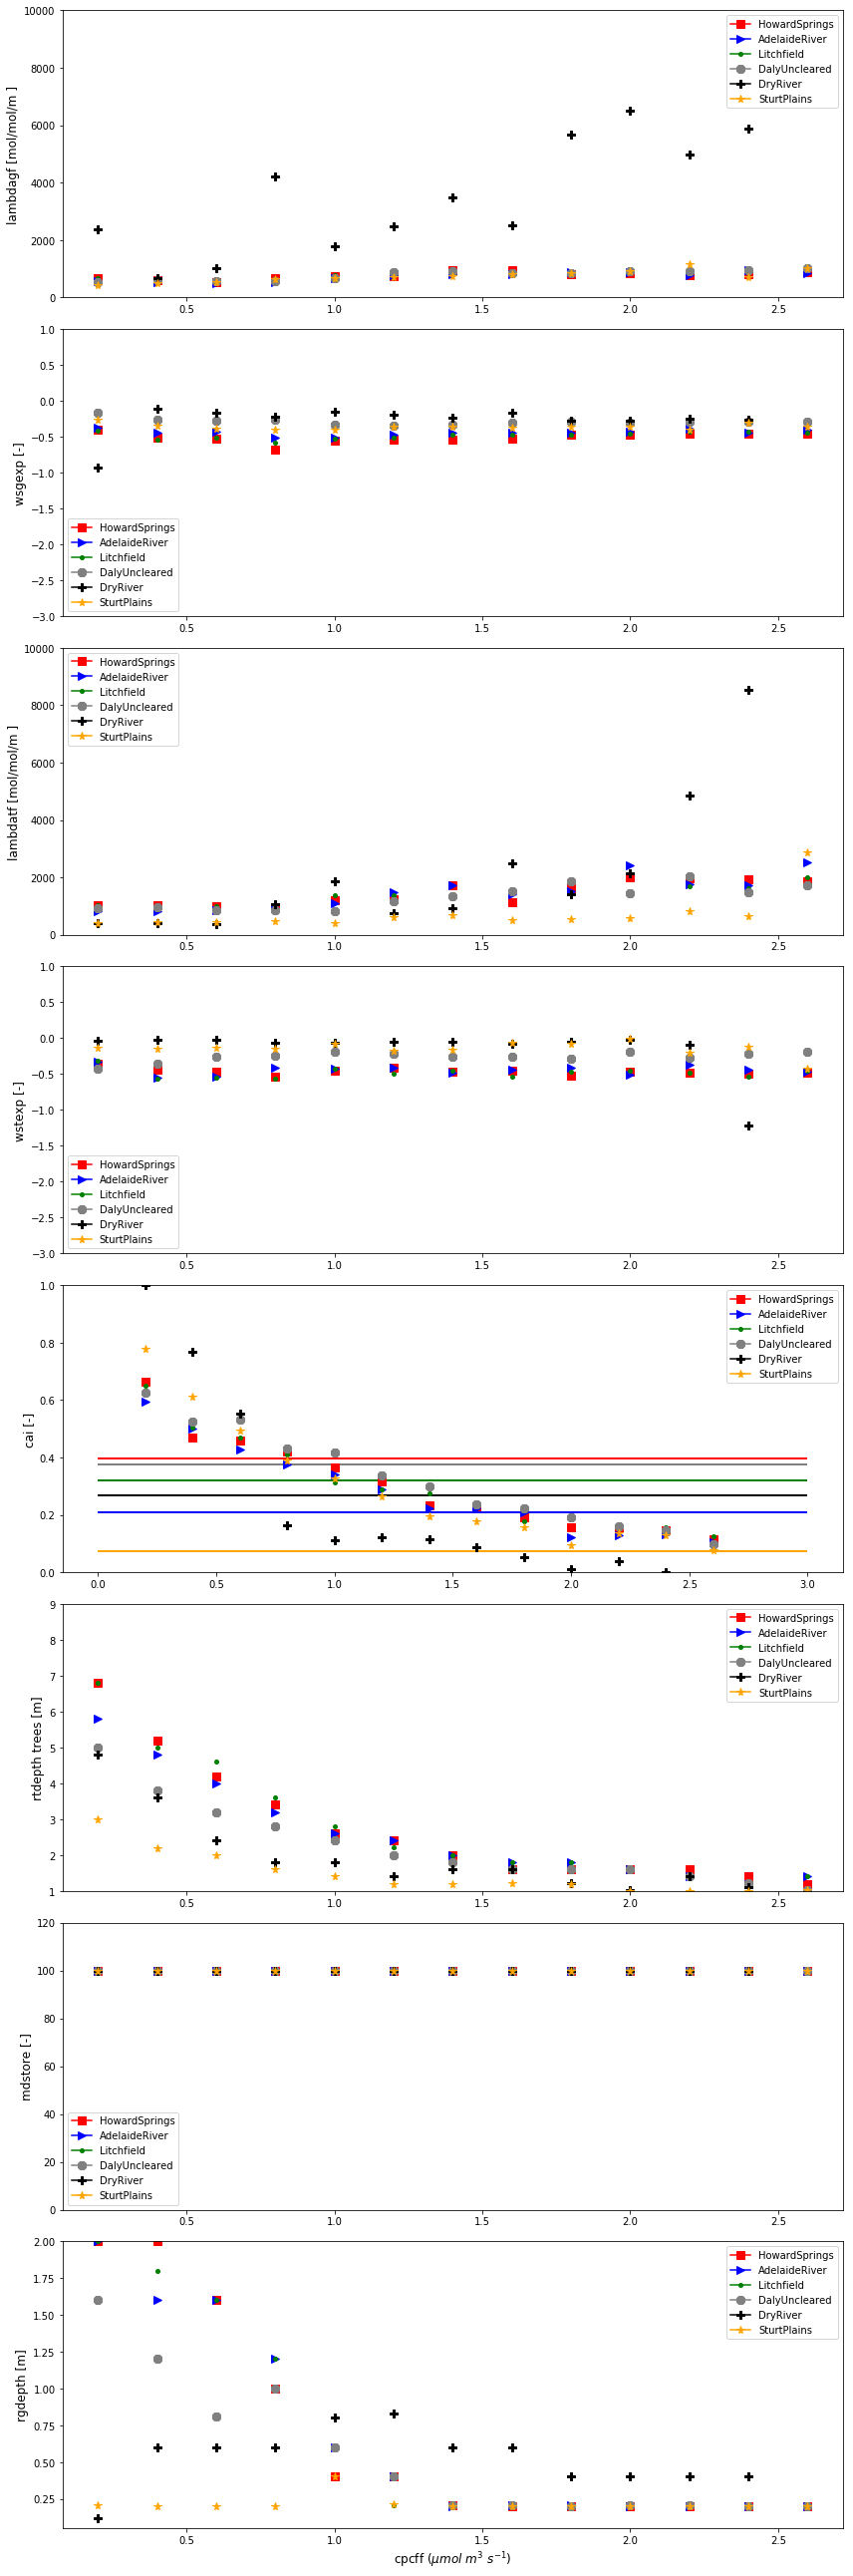

In [8]:
#plot parameters
cpcff_vals = np.arange(0.2,2.8, 0.2)
study_sites = ["HowardSprings", "AdelaideRiver", "Litchfield", "DalyUncleared", "DryRiver", "SturtPlains" ]

cpcff_str = map(str, np.round(cpcff_vals,1) ) 
cpcff_str = list(cpcff_str)

cai_fpar = [0.3971929824561404, #HowardSprings
0.20771929824561405, #AdelaideRiver
0.32000000000000006, #Litchfield
0.37473684210526315, #DalyUncleared
0.26616541353383455, #DryRiver
0.07443609022556391 #SturtPlains
] 


symbols = ['s', '>', '.','8', 'P','*']
colors = ['red', 'blue', 'green', 'gray', 'black', 'orange']

fig=plt.figure(figsize=(16, 5), dpi= 80, facecolor='w', edgecolor='k')
fig, ax = plt.subplots(nrows=8, ncols=1, figsize=(12, 36)) 


i_cpcff = 0
for cpcff in  cpcff_str:  
    ibasin = 0

    for site in study_sites:
        try:
            if(cpcff == "1.0"):
                params = np.loadtxt("../../data/VOM_output/"+  site  +"/freedrainage_cpcff" + cpcff +
                      "/sce_best/pars.txt")
            else:
                params = np.loadtxt("../../work/"+  site  +"/freedrainage_cpcff" + cpcff +
                      "/best/input/pars.txt")
            
        #params_nofree = np.loadtxt("../../data/VOM_output/"+  site  +"/nofreedrainage_cpcff" + cpcff_str[i_cpcff] +
        #          "/sce_best/pars.txt")

            for i in range(0,8):
                if(i_cpcff ==0):
                    ax[i].plot(cpcff_vals[i_cpcff], params[i], marker=symbols[ibasin], color=colors[ibasin] , markersize=8, label=site)     
                else:
                    ax[i].plot(cpcff_vals[i_cpcff], params[i], marker=symbols[ibasin], color=colors[ibasin] , markersize=8)     
                if(i == 4):
                    ax[i].hlines( cai_fpar[ibasin], 0, 3, color = colors[ibasin] )

                
        except OSError:
            print('file not found')
        ibasin = ibasin + 1 
    i_cpcff = i_cpcff + 1
    
ax[0].set_ylabel("lambdagf [mol/mol/m ]", size=12 )  
ax[0].set_ylim( 0, 10000  )    
ax[0].legend(prop={'size':10})

ax[1].set_ylabel("wsgexp [-]", size=12 )  
ax[1].set_ylim( -3, 1  )    
ax[1].legend(prop={'size':10})

ax[2].set_ylabel("lambdatf [mol/mol/m ]", size=12 )
ax[2].set_ylim( 0, 10000  )    
ax[2].legend(prop={'size':10})

ax[3].set_ylabel("wstexp [-]", size=12 ) 
ax[3].set_ylim( -3, 1  )    
ax[3].legend(prop={'size':10})


ax[4].set_ylabel("cai [-]", size=12 )  
ax[4].set_ylim( 0, 1  )    
ax[4].legend(prop={'size':10})

ax[5].set_ylabel("rtdepth trees [m]", size=12 )  
ax[5].set_ylim( 1, 9  )    
ax[5].legend(prop={'size':10})

ax[6].set_ylabel("mdstore [-]", size=12 )  
ax[6].set_ylim( 0, 120  )    
ax[6].legend(prop={'size':10})

ax[7].set_ylabel("rgdepth [m]", size=12 )  
ax[7].set_xlabel(r'cpcff ($\mu$$mol$ $m^3$ $s^{-1}$)', size=12 )  
ax[7].set_ylim( 0.05, 2  )    
ax[7].legend(prop={'size':10})

plt.tight_layout()
    
plt.show()




Optimal vegetation parameters for the different values of the water transport cost factor cpcff. The lines for the parameter CAI indicate the minimum vegetation cover during the dry season derived from fPar-values. In this way, it can be seen that values around 1.0 $\mu mol/m^3/s$ reproduce best the vegetation cover (HowardSprings = 0.8 $\mu mol/m^3/s$, AdelaideRiver =  1.4 $\mu mol/m^3/s$, Litchfield =  1.0 $\mu mol/m^3/s$, DalyUncleared =  1.0 $\mu mol/m^3/s$, DryRiver =  0.8 $\mu mol/m^3/s$, SturtPlains =  2.6 $\mu mol/m^3/s$).

No handles with labels found to put in legend.


file not found


<Figure size 1280x400 with 0 Axes>

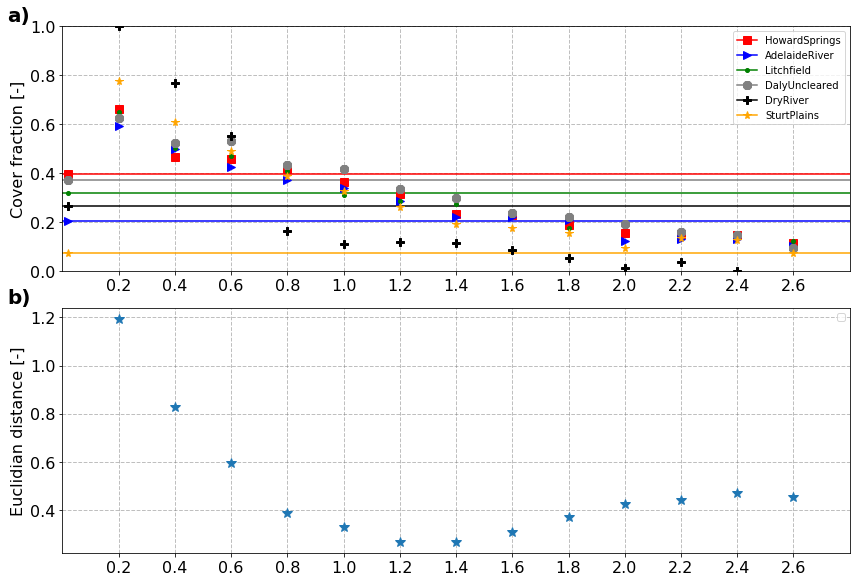

In [36]:
#plot parameters
cpcff_vals = np.arange(0.2,2.8, 0.2)
study_sites = ["HowardSprings", "AdelaideRiver", "Litchfield", "DalyUncleared", "DryRiver", "SturtPlains" ]

cpcff_str = map(str, np.round(cpcff_vals,1) ) 
cpcff_str = list(cpcff_str)

cai_fpar = [0.3971929824561404, #HowardSprings
0.20771929824561405, #AdelaideRiver
0.32000000000000006, #Litchfield
0.37473684210526315, #DalyUncleared
0.26616541353383455, #DryRiver
0.07443609022556391 #SturtPlains
] 

err = np.zeros((len(cpcff_vals),6))
ED = np.zeros((len(cpcff_vals)))

symbols = ['s', '>', '.','8', 'P','*']
colors = ['red', 'blue', 'green', 'gray', 'black', 'orange']

fig=plt.figure(figsize=(16, 5), dpi= 80, facecolor='w', edgecolor='k')
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(12, 8)) 



i_cpcff = 0
for cpcff in  cpcff_str:  
    ibasin = 0

    for site in study_sites:
        try:
            if(cpcff == "1.0"):
                params = np.loadtxt("../../data/VOM_output/"+  site  +"/freedrainage_cpcff" + cpcff +
                      "/sce_best/pars.txt")
            else:
                params = np.loadtxt("../../work/"+  site  +"/freedrainage_cpcff" + cpcff +
                      "/best/input/pars.txt")

            cai = params[4]
                
            err[i_cpcff, ibasin] = cai - cai_fpar[ibasin]
                          
            if(i_cpcff ==0):
                ax[0].plot(cpcff_vals[i_cpcff], cai, marker=symbols[ibasin], color=colors[ibasin] , markersize=8, label=site)     
                ax[0].plot(0.02, cai_fpar[ibasin], marker=symbols[ibasin], color=colors[ibasin] , markersize=8)     
                ax[0].hlines( cai_fpar[ibasin], 0, 3, color = colors[ibasin] )
            else:
                ax[0].plot(cpcff_vals[i_cpcff], cai, marker=symbols[ibasin], color=colors[ibasin] , markersize=8)     

                
        except OSError:
            print('file not found')
        ibasin = ibasin + 1 
    i_cpcff = i_cpcff + 1
    

ax[0].set_ylabel("Cover fraction [-]", size=16 )  
ax[0].set_ylim( 0, 1  ) 
ax[0].set_xlim( 0, 2.8  )    

ax[0].legend(prop={'size':10})

ax[0].text(-0.07, 1.02, "a)", transform=ax[0].transAxes, 
            size=20, weight='bold')
ax[0].tick_params(axis='both', which='major', labelsize=16)
ax[0].set_xticks(cpcff_vals)
ax[0].set_xticklabels(cpcff_str)
ax[0].grid(color='gray', linestyle='--', linewidth=1, alpha=0.5)

#combining the errors
for i_cpcff in range(len(cpcff_str)):
    ED[i_cpcff] = np.sqrt(np.sum(err[i_cpcff,:]**2))

ax[1].plot(cpcff_vals, ED, "*", markersize=10)
ax[1].set_ylabel("Euclidian distance [-]", size = 16 )  
#ax[1].set_ylim( 1, 9  )
ax[1].set_xlim( 0, 2.8  )    

ax[1].legend(prop={'size':10})
ax[1].text(-0.07, 1.02, "b)", transform=ax[1].transAxes, 
            size=20, weight='bold')
ax[1].tick_params(axis='both', which='major', labelsize=16)
ax[1].set_xticks(cpcff_vals)
ax[1].set_xticklabels(cpcff_str)
ax[1].grid(color='gray', linestyle='--', linewidth=1, alpha=0.5)
plt.tight_layout()
    
plt.show()




### Dynamic water tables

In [ ]:
#plot parameters
cpcff_vals = np.arange(0.2,2.8, 0.2)
study_sites = ["HowardSprings", "AdelaideRiver", "Litchfield", "DalyUncleared", "DryRiver", "SturtPlains" ]

cpcff_str = map(str, np.round(cpcff_vals,1) ) 
cpcff_str = list(cpcff_str)

cai_fpar = [0.3971929824561404, #HowardSprings
0.20771929824561405, #AdelaideRiver
0.32000000000000006, #Litchfield
0.37473684210526315, #DalyUncleared
0.26616541353383455, #DryRiver
0.07443609022556391 #SturtPlains
] 


symbols = ['s', '>', '.','8', 'P','*']
colors = ['red', 'blue', 'green', 'gray', 'black', 'orange']

fig=plt.figure(figsize=(16, 5), dpi= 80, facecolor='w', edgecolor='k')
fig, ax = plt.subplots(nrows=8, ncols=1, figsize=(12, 36)) 


i_cpcff = 0
for cpcff in  cpcff_str:  
    ibasin = 0

    for site in study_sites:
        try:
            if(cpcff == "1.0"):
                params = np.loadtxt("../../data/VOM_output/"+  site  +"/nofreedrainage_cpcff" + cpcff +
                      "/sce_best/pars.txt")
            else:
                params = np.loadtxt("../../work/"+  site  +"/nofreedrainage_cpcff" + cpcff +
                      "/best/input/pars.txt")

            
        #params_nofree = np.loadtxt("../../data/VOM_output/"+  site  +"/nofreedrainage_cpcff" + cpcff_str[i_cpcff] +
        #          "/sce_best/pars.txt")

            for i in range(0,8):
                if(i_cpcff ==0):
                    ax[i].plot(cpcff_vals[i_cpcff], params[i], marker=symbols[ibasin], color=colors[ibasin] , markersize=8, label=site)     
                else:
                    ax[i].plot(cpcff_vals[i_cpcff], params[i], marker=symbols[ibasin], color=colors[ibasin] , markersize=8)     
                if(i == 4):
                    ax[i].hlines( cai_fpar[ibasin], 0, 3, color = colors[ibasin] )

                
        except OSError:
            print('file not found')
        ibasin = ibasin + 1 
    i_cpcff = i_cpcff + 1
    
ax[0].set_ylabel("lambdagf [mol/mol/m ]", size=12 )  
ax[0].set_ylim( 0, 10000  )    
ax[0].legend(prop={'size':10})

ax[1].set_ylabel("wsgexp [-]", size=12 )  
ax[1].set_ylim( -3, 1  )    
ax[1].legend(prop={'size':10})

ax[2].set_ylabel("lambdatf [mol/mol/m ]", size=12 )
ax[2].set_ylim( 0, 10000  )    
ax[2].legend(prop={'size':10})

ax[3].set_ylabel("wstexp [-]", size=12 ) 
ax[3].set_ylim( -3, 1  )    
ax[3].legend(prop={'size':10})


ax[4].set_ylabel("cai [-]", size=12 )  
ax[4].set_ylim( 0, 1  )    
ax[4].legend(prop={'size':10})

ax[5].set_ylabel("rtdepth trees [m]", size=12 )  
ax[5].set_ylim( 1, 9  )    
ax[5].legend(prop={'size':10})

ax[6].set_ylabel("mdstore [-]", size=12 )  
ax[6].set_ylim( 0, 120  )    
ax[6].legend(prop={'size':10})

ax[7].set_ylabel("rgdepth [m]", size=12 )  
ax[7].set_xlabel(r'cpcff ($\mu$$mol$ $m^3$ $s^{-1}$)', size=12 )  
ax[7].set_ylim( 0.05, 2  )    
ax[7].legend(prop={'size':10})

plt.tight_layout()
    
plt.show()




Optimal vegetation parameters for the different values of the water transport cost factor cpcff. The lines for the parameter CAI indicate the minimum vegetation cover during the dry season derived from fPar-values. Also here, it can be seen that values around 1.0 $\mu mol/m^3/s$ reproduce best the vegetation cover (HowardSprings = 1.2 and 2.0 $\mu mol/m^3/s$, AdelaideRiver =  1.4 $\mu mol/m^3/s$, Litchfield =  1.0 $\mu mol/m^3/s$, DalyUncleared =  1.0 $\mu mol/m^3/s$, DryRiver =  0.8 $\mu mol/m^3/s$, SturtPlains =  2.6 $\mu mol/m^3/s$).